# EDA Dialogue

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('./dataset/the-office-lines.xlsx')

In [2]:
df.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59909 entries, 0 to 59908
Data columns (total 7 columns):
id           59909 non-null int64
season       59909 non-null int64
episode      59909 non-null int64
scene        59909 non-null int64
line_text    59909 non-null object
speaker      59909 non-null object
deleted      59909 non-null bool
dtypes: bool(1), int64(4), object(2)
memory usage: 2.8+ MB


In [4]:
df.shape

(59909, 7)

In [5]:
column_names = df.columns
column_names

Index(['id', 'season', 'episode', 'scene', 'line_text', 'speaker', 'deleted'], dtype='object')

In [6]:
df.dtypes

id            int64
season        int64
episode       int64
scene         int64
line_text    object
speaker      object
deleted        bool
dtype: object

In [7]:
main_characters = ['Michael','Dwight','Jim','Pam','Stanley','Phyllis','Andy','Ryan','Kelly','Toby','Creed','Meredith']

# Explorng Deleted Scenes

In [8]:
df['deleted'].value_counts()

False    57973
True      1936
Name: deleted, dtype: int64

In [9]:
df[df['deleted']==True]

,id,season,episode,scene,line_text,speaker,deleted
229,230,1,1,40,"Dwight Schrute. My father's name, also Dwight ...",Dwight,True
230,231,1,1,40,[holding up a Dundie and pretending it is talk...,Michael,True
231,232,1,1,40,"My name is Jim Halpert and I am a sales rep, w...",Jim,True
232,233,1,1,41,Pam! Pam-Pam! Pam has been with us for... for...,Michael,True
233,234,1,1,41,I guess.,Pam,True
...,...,...,...,...,...,...,...
13320,13321,3,12,40,Yeah. Can I see it when I get back?,Jim,True
13321,13322,3,12,40,Yeah.,Pam,True
13322,13323,3,12,40,Congratulations.,Jim,True
13323,13324,3,12,40,Thanks.,Pam,True


In [10]:
df_del  =df.drop_duplicates(['season','episode','scene','deleted'])
df_del

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
5,6,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael,False
6,7,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael,False
15,16,1,1,4,"People say I am the best boss. They go, 'God w...",Michael,False
16,17,1,1,5,[singing] Shall I play for you? Pa rum pump um...,Dwight,False
...,...,...,...,...,...,...,...
59904,59905,9,23,112,It all seems so very arbitrary. I applied for ...,Creed,False
59905,59906,9,23,113,I just feel lucky that I got a chance to share...,Meredith,False
59906,59907,9,23,114,I���m happy that this was all filmed so I can ...,Phyllis,False
59907,59908,9,23,115,I sold paper at this company for 12 years. My ...,Jim,False


In [11]:
df_del.groupby('season')['deleted'].value_counts().to_dict()

{(1, False): 238,
 (1, True): 68,
 (2, False): 1053,
 (2, True): 239,
 (3, False): 1386,
 (3, True): 5,
 (4, False): 882,
 (5, False): 1130,
 (6, False): 1023,
 (7, False): 1002,
 (8, False): 1027,
 (9, False): 1108}

In [12]:
df_del['deleted'].value_counts()

False    8849
True      312
Name: deleted, dtype: int64

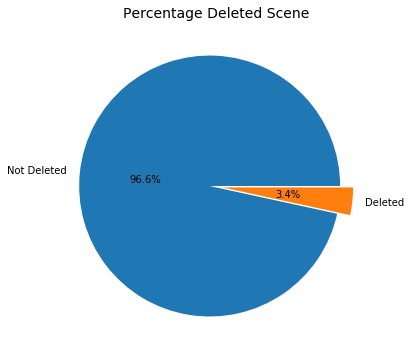

In [13]:
plt.figure(figsize=(10,6))
labels = ['Not Deleted','Deleted']
values = df_del['deleted'].value_counts().values
plt.pie(x=values, autopct='%.1f%%',explode=[0.05]*2,labels=labels, pctdistance=0.5)
plt.title('Percentage Deleted Scene', fontsize=14)
plt.savefig("./Visualizations/DeliveryPieChart.png")
plt.show()

In [14]:
df = df[df['deleted']==False]
df.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [15]:
df.shape

(57973, 7)

In [16]:
df.drop(['id','deleted'],inplace=True,axis=1)
df.head()

,season,episode,scene,line_text,speaker
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim
2,1,1,1,So you've come to the master for guidance? Is ...,Michael
3,1,1,1,"Actually, you called me in here, but yeah.",Jim
4,1,1,1,"All right. Well, let me show you how it's done.",Michael


In [17]:
df.isnull().sum()

season       0
episode      0
scene        0
line_text    0
speaker      0
dtype: int64

In [18]:
df.groupby('season')['episode'].nunique()

season
1     6
2    22
3    23
4    14
5    26
6    24
7    24
8    24
9    23
Name: episode, dtype: int64

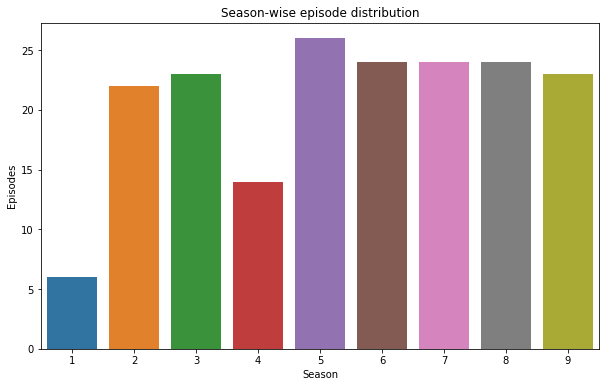

In [19]:
plt.figure(figsize=(10,6))

seasons = df['season'].unique().tolist()
episodes = df.groupby('season')['episode'].nunique().tolist()

sns.barplot(x=seasons,y=episodes)
plt.title('Season-wise episode distribution')
plt.xlabel('Season')
plt.ylabel('Episodes')
plt.savefig('./Visualizations/Seson-wise-distribution.png')
plt.show()

Season 1 has lowest number of Episodes(6), while season 5 has the highest (26).Every season except season 1 and season 4 has 20+ episodes.Only six episodes were ordered for the first season as kind of an experiment to see if audiences in the United States would latch on to the bleak, dry comedy style without a laugh track that was already a hit in the United Kingdom. Fourth season due to the ongoing Hollywood writer's strike.

In [20]:
df_scene = df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','scene'],keep='first')
df_scene

,season,episode,scene,line_text,speaker
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
5,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael
6,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael
15,1,1,4,"People say I am the best boss. They go, 'God w...",Michael
16,1,1,5,[singing] Shall I play for you? Pa rum pump um...,Dwight
...,...,...,...,...,...
59904,9,23,112,It all seems so very arbitrary. I applied for ...,Creed
59905,9,23,113,I just feel lucky that I got a chance to share...,Meredith
59906,9,23,114,I���m happy that this was all filmed so I can ...,Phyllis
59907,9,23,115,I sold paper at this company for 12 years. My ...,Jim


In [21]:
df_scene.groupby(['season','episode'])['scene'].count()

season  episode
1       1           39
        2           35
        3           39
        4           49
        5           40
                  ... 
9       19          49
        20          46
        21          53
        22          70
        23         116
Name: scene, Length: 186, dtype: int64

In [22]:
df_scene.groupby(['season','episode'])['scene'].count().nlargest()

season  episode
5       1          116
9       23         116
4       14         103
        1           92
        4           92
Name: scene, dtype: int64

In [23]:
df_scene.groupby(['season','episode'])['scene'].count().nsmallest()


season  episode
6       13         21
8       20         25
7       14         26
        16         26
5       12         27
Name: scene, dtype: int64

In [24]:
df_scene_episode = df_scene.pivot_table(index='season',columns='episode',values='scene',aggfunc='count')
df_scene_episode.head()

episode,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
season,,,,,,,,,,,,,,,,,,,,,
1,39.0,35.0,39.0,49.0,40.0,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62.0,45.0,50.0,53.0,43.0,37.0,44.0,41.0,38.0,70.0,...,45.0,44.0,42.0,39.0,59.0,57.0,NaN,NaN,NaN,NaN
3,61.0,51.0,66.0,55.0,60.0,52.0,51.0,76.0,32.0,88.0,...,61.0,57.0,59.0,75.0,60.0,77.0,88.0,NaN,NaN,NaN
4,92.0,80.0,90.0,92.0,46.0,50.0,61.0,46.0,31.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,116.0,30.0,49.0,50.0,54.0,51.0,36.0,29.0,30.0,49.0,...,32.0,35.0,46.0,40.0,39.0,46.0,32.0,35.0,54.0,42.0


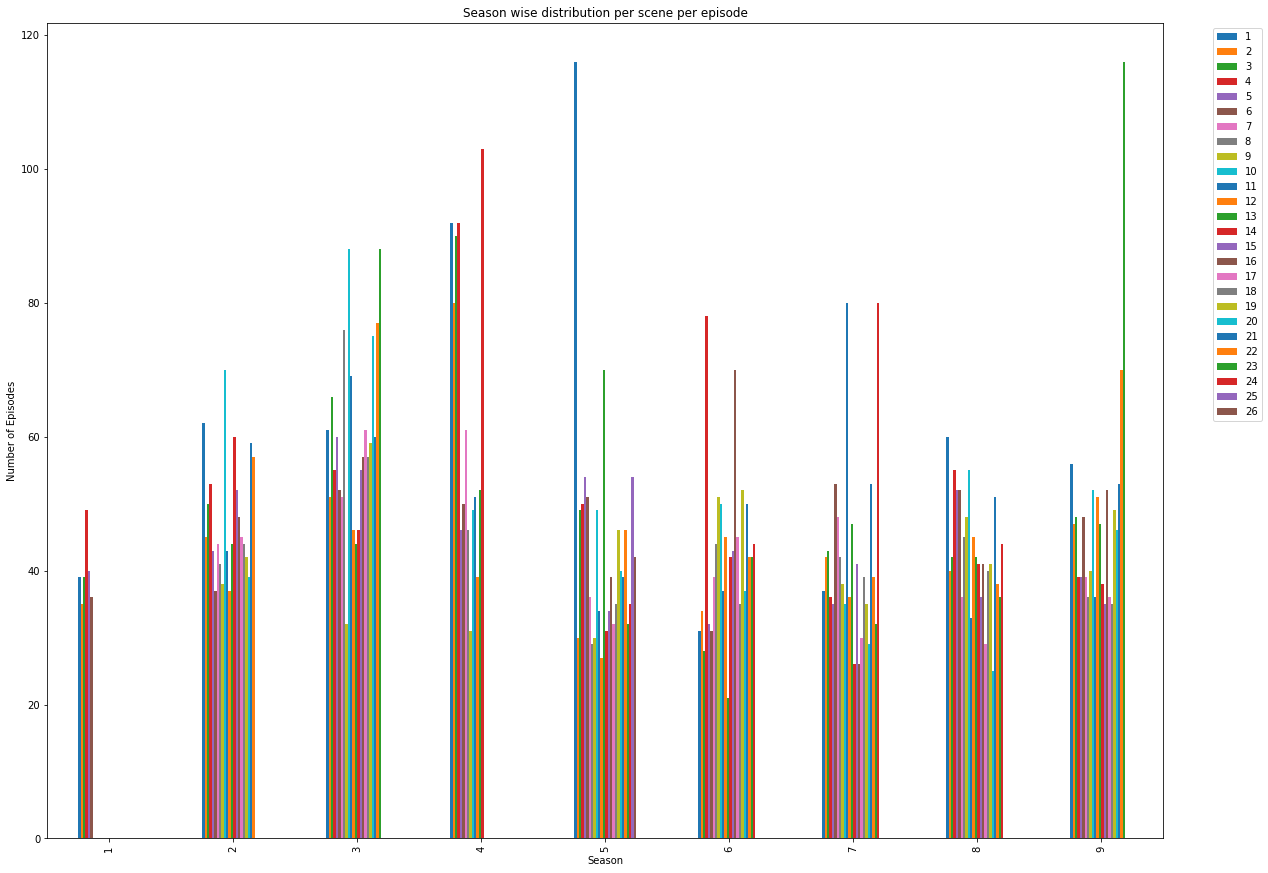

In [25]:
df_scene_episode.plot(kind='bar',figsize=(20,15),title='Season wise distribution per scene per episode')
plt.xlabel('Season')
plt.ylabel('Number of Episodes')
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
plt.savefig('./Visualizations/Season vs scene per episode.png',fontsize=14)
plt.show()

In [26]:
df_scene_total = df_scene_episode.sum(axis=1)
df_scene_total

season
1     238.0
2    1053.0
3    1386.0
4     882.0
5    1130.0
6    1023.0
7    1002.0
8    1027.0
9    1108.0
dtype: float64

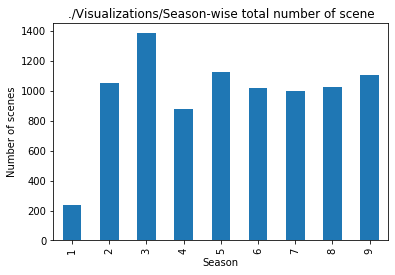

In [27]:
df_scene_total.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Number of scenes')
plt.savefig('Scenes vs Season.png')
plt.title('./Visualizations/Season-wise total number of scene')
plt.show()

Obviously, season 1 has lowest number of scenes because of lowest number of episodes, followed by Season 4 for same reason.Although season 5 has highest number of episodes it does not have highest number of scene. Season 3 has highest number of scene followed by Season 2

## Line Text

In [28]:
df.groupby(['season','episode'])['line_text'].count()

season  episode
1       1          229
        2          217
        3          244
        4          265
        5          235
                  ... 
9       19         273
        20         234
        21         382
        22         501
        23         522
Name: line_text, Length: 186, dtype: int64

In [29]:
df.groupby(['season','episode'])['line_text'].count().nlargest()

season  episode
6       16         625
4       14         617
        2          615
7       11         598
4       3          597
Name: line_text, dtype: int64

In [30]:
df.groupby(['season','episode'])['line_text'].count().nsmallest()

season  episode
7       16          72
6       13         131
3       1          173
        15         180
        9          191
Name: line_text, dtype: int64

In [31]:
#Total number of line spoken in the series
df.groupby(['season','episode'])['line_text'].count().sum()

57973

In [32]:
df_line = df.pivot_table(index='season',columns='episode',values='line_text',aggfunc='count')
df_line

episode,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
season,,,,,,,,,,,,,,,,,,,,,
1,229.0,217.0,244.0,265.0,235.0,346.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,279.0,283.0,287.0,319.0,276.0,278.0,254.0,284.0,275.0,292.0,...,220.0,267.0,250.0,213.0,257.0,385.0,NaN,NaN,NaN,NaN
3,173.0,335.0,291.0,313.0,312.0,279.0,260.0,584.0,191.0,547.0,...,340.0,356.0,386.0,398.0,323.0,365.0,544.0,NaN,NaN,NaN
4,560.0,615.0,597.0,557.0,269.0,324.0,274.0,300.0,331.0,276.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,569.0,265.0,311.0,311.0,435.0,417.0,325.0,298.0,323.0,240.0,...,311.0,297.0,267.0,309.0,256.0,298.0,288.0,319.0,298.0,273.0
6,332.0,268.0,303.0,552.0,353.0,315.0,319.0,367.0,247.0,267.0,...,279.0,281.0,359.0,267.0,328.0,308.0,326.0,245.0,NaN,NaN
7,240.0,268.0,229.0,321.0,390.0,284.0,286.0,278.0,307.0,310.0,...,313.0,290.0,244.0,262.0,329.0,265.0,257.0,494.0,NaN,NaN
8,274.0,320.0,317.0,267.0,291.0,324.0,321.0,282.0,299.0,352.0,...,259.0,264.0,261.0,307.0,292.0,239.0,288.0,295.0,NaN,NaN
9,225.0,296.0,243.0,316.0,292.0,283.0,294.0,322.0,287.0,253.0,...,219.0,318.0,273.0,234.0,382.0,501.0,522.0,NaN,NaN,NaN


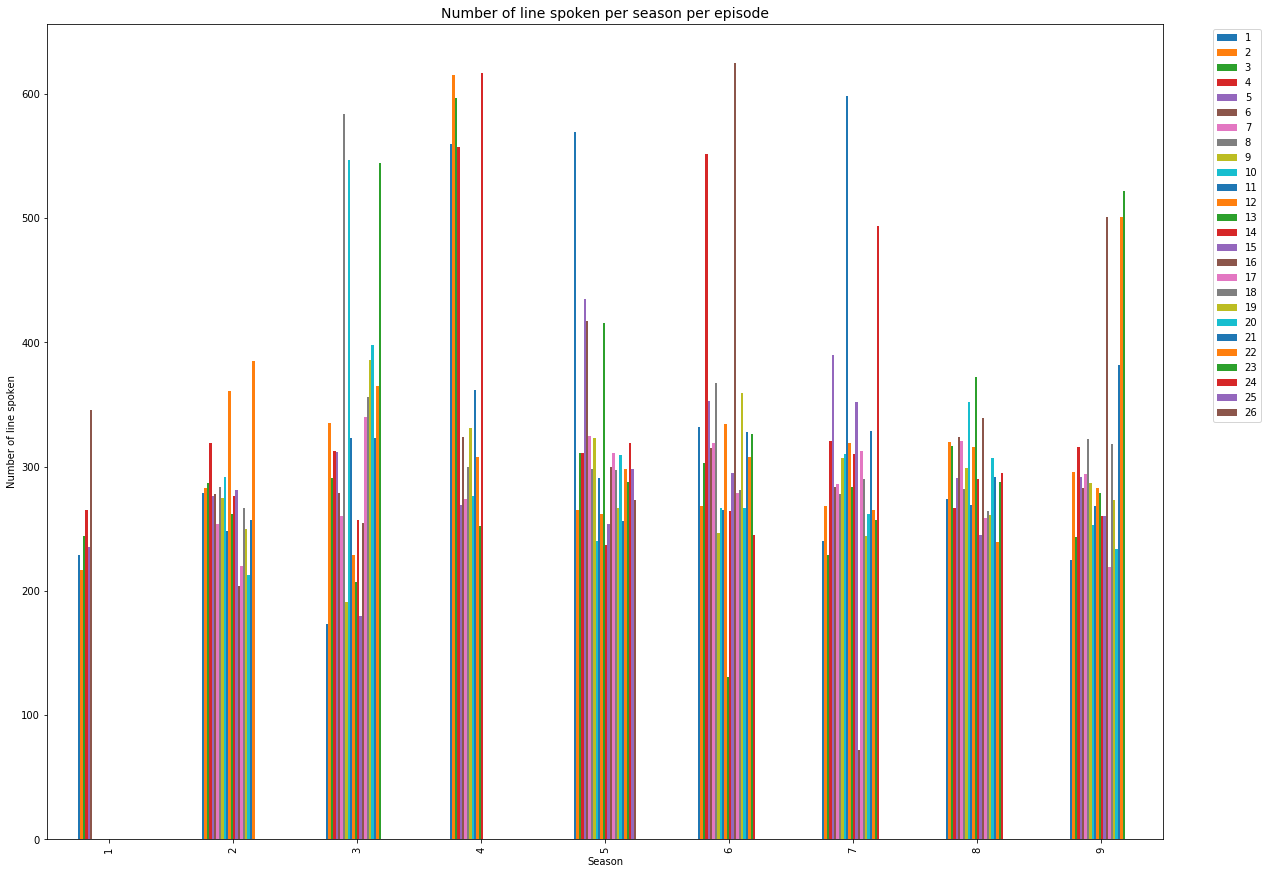

In [33]:
df_line.plot(kind='bar',figsize=(20,15))
plt.xlabel('Season')
plt.ylabel('Number of line spoken')
plt.title('Number of line spoken per season per episode', fontsize=14)
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left')
plt.savefig('./Visualizations/Number of line spoken per season per episode.png')
plt.show()

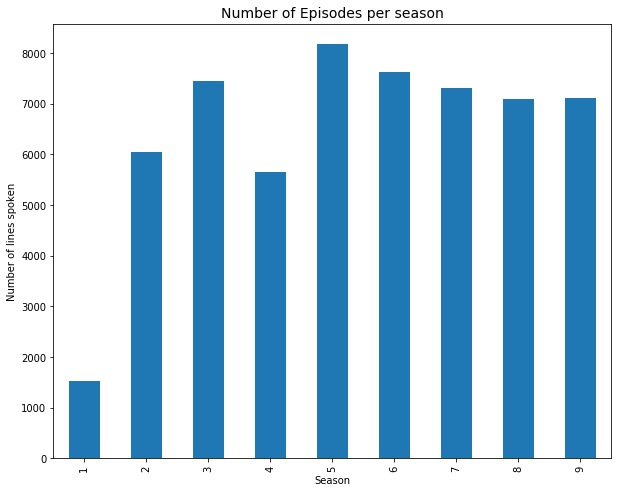

In [34]:
df.groupby('season')['line_text'].count().plot(kind='bar',figsize=(10,8))
plt.title('Number of Episodes per season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Number of lines spoken')
plt.savefig('./Visualizations/Number of line spoken.png')
plt.show()

Season 5 has largest number of lines spoken, followed by Season 6. Although Season 3 has highest number of Scenes, it does not have highest number of line spoken

## Speaker

In [35]:
df['speaker'].nunique()

790

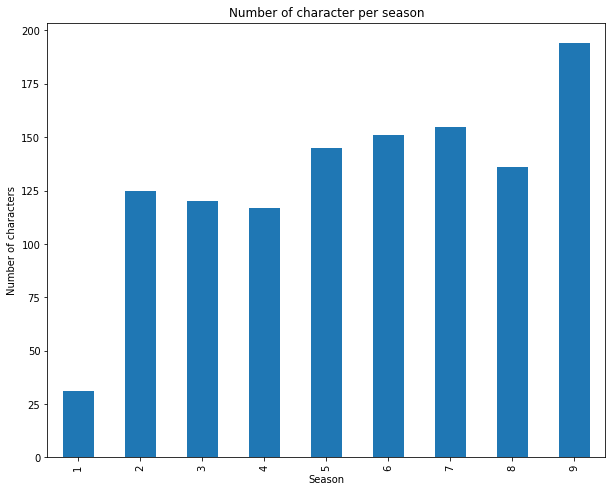

In [36]:
df.groupby('season')['speaker'].nunique().plot(kind='bar',figsize=(10,8))
plt.xlabel('Season')
plt.ylabel('Number of characters')
plt.title('Number of character per season')
plt.savefig('./Visualizations/Number of character per season.png')
plt.show()

In [37]:
df['speaker'].value_counts()

Michael            11574
Dwight              7167
Jim                 6609
Pam                 5205
Andy                3968
                   ...  
Phyliss                1
Alonzo                 1
College Student        1
Nail stylist 1         1
Mr. O'Malley           1
Name: speaker, Length: 790, dtype: int64

Though Michael did not appeared in last 2 seasons he has most line spoken through out series, followed by Dwight, Jim , Pam and Andy(Maybe because of replacement of Michael in season 8)

In [38]:
df_temp = df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','speaker','scene'],keep='first')
df_temp

,season,episode,scene,line_text,speaker
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim
5,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael
6,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael
7,1,1,3,Well. I don't know.,Pam
...,...,...,...,...,...
59904,9,23,112,It all seems so very arbitrary. I applied for ...,Creed
59905,9,23,113,I just feel lucky that I got a chance to share...,Meredith
59906,9,23,114,I���m happy that this was all filmed so I can ...,Phyllis
59907,9,23,115,I sold paper at this company for 12 years. My ...,Jim


In [39]:
df_char = df_temp.pivot_table(index='speaker', columns=['season','episode'], values='scene',aggfunc='count')
df_char=df_char.dropna(axis=0,how='any',thresh=19)
df_char

season       1                                   2                    ...  \
episode     1     2     3     4     5     6     1     2     3     4   ...   
speaker                                                               ...   
All        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Andy       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Angela     1.0   1.0   3.0   4.0   2.0   1.0   2.0   1.0   3.0   4.0  ...   
Clark      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Creed      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Darryl     NaN   NaN   NaN   NaN   7.0   NaN   1.0   2.0   NaN   NaN  ...   
David      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Dwight    10.0   6.0  16.0  24.0   9.0   7.0  13.0   5.0  20.0  20.0  ...   
Erin       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Everyone   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN  ...   
Gabe       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Jan        3.0   NaN   2.0   NaN   NaN   1.0   1.0   4.0   NaN   NaN  ...   
Jim       11.0  11.0  11.0  21.0  13.0   9.0  16.0   8.0  22.0  14.0  ...   
Karen      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Kelly      NaN   2.0   NaN   NaN   NaN   NaN   4.0   NaN   NaN   2.0  ...   
Kevin      1.0   5.0   4.0   2.0   1.0   2.0   1.0   3.0   4.0   4.0  ...   
Meredith   NaN   NaN   2.0   3.0   NaN   NaN   NaN   1.0   1.0   3.0  ...   
Michael   20.0  25.0  19.0  19.0  31.0  21.0  36.0  26.0  22.0  26.0  ...   
Nellie     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Oscar      3.0   2.0   5.0   4.0   2.0   1.0   3.0   NaN   5.0   2.0  ...   
Pam       14.0   7.0  10.0  10.0   6.0  11.0  22.0  13.0  12.0   9.0  ...   
Pete       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Phyllis    2.0   NaN   NaN   2.0   3.0   NaN   5.0   2.0   2.0   3.0  ...   
Robert     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Roy        2.0   NaN   NaN   1.0   8.0   2.0   3.0   3.0   NaN   2.0  ...   
Ryan       5.0   1.0   1.0   2.0   5.0   4.0   2.0   1.0   3.0  18.0  ...   
Stanley    2.0   2.0   5.0   2.0   1.0   1.0   3.0   1.0   3.0   4.0  ...   
Toby       NaN   1.0   NaN   2.0   NaN   1.0   NaN  10.0   NaN   NaN  ...   

season       9                                                        
episode     14    15    16    17    18    19    20    21    22    23  
speaker                                                               
All        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   9.0  
Andy       NaN  11.0  19.0   3.0   6.0  12.0  12.0  20.0   9.0  15.0  
Angela     6.0   2.0   7.0   4.0  11.0   2.0  11.0   8.0   9.0   9.0  
Clark      1.0   5.0   3.0   3.0   7.0  12.0   4.0   3.0   3.0   3.0  
Creed      1.0   NaN   2.0   3.0   NaN   1.0   1.0   2.0   3.0   6.0  
Darryl     9.0   2.0   3.0   1.0   4.0   NaN   6.0   2.0   9.0  10.0  
David      NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Dwight    11.0   9.0   8.0  18.0   8.0  19.0  10.0  13.0  30.0  27.0  
Erin       7.0  10.0   8.0   4.0   3.0   7.0   9.0   5.0   9.0   6.0  
Everyone   NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   1.0   NaN  
Gabe       NaN   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Jan        NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Jim        7.0   7.0   4.0   3.0   4.0   5.0   7.0  16.0  23.0  33.0  
Karen      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
Kelly      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0  
Kevin      4.0   4.0   3.0   6.0   6.0   2.0   4.0   9.0  11.0  14.0  
Meredith   1.0   2.0   3.0   3.0   3.0   2.0   NaN   1.0   6.0   9.0  
Michael    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  
Nellie     5.0   4.0   3.0   2.0   4.0   6.0  10.0   3.0   NaN   5.0  
Oscar      8.0   5.0   4.0   5.0   9.0   5.0   1.0

In [40]:
df_scene_total = df_char.sum(level=[0], axis=1)
df_scene_total

season,1,2,3,4,5,6,7,8,9
speaker,,,,,,,,,
All,0.0,1.0,1.0,4.0,2.0,2.0,13.0,14.0,14.0
Andy,0.0,0.0,155.0,95.0,171.0,194.0,202.0,342.0,182.0
Angela,12.0,71.0,126.0,77.0,95.0,66.0,77.0,80.0,134.0
Clark,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,91.0
Creed,0.0,28.0,50.0,35.0,37.0,31.0,40.0,29.0,43.0
Darryl,7.0,21.0,21.0,20.0,36.0,30.0,94.0,125.0,116.0
David,0.0,5.0,15.0,1.0,31.0,23.0,1.0,5.0,5.0
Dwight,72.0,289.0,363.0,189.0,306.0,273.0,226.0,315.0,333.0
Erin,0.0,0.0,0.0,0.0,20.0,122.0,132.0,180.0,160.0


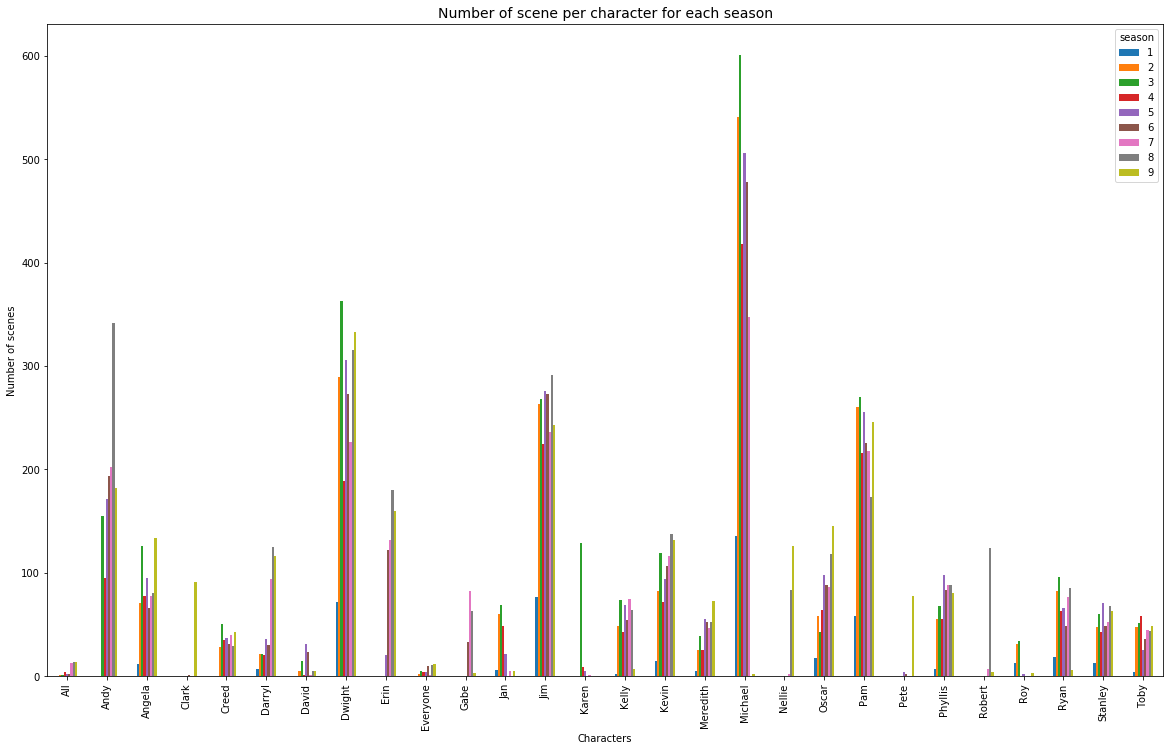

In [41]:
df_scene_total.plot(kind='bar',figsize=(20,12))
plt.xlabel('Characters')
plt.ylabel('Number of scenes')
plt.title('Number of scene per character for each season', fontsize=14)
plt.savefig('./Visualizations/Number of scene per character for each season.png')
plt.show()

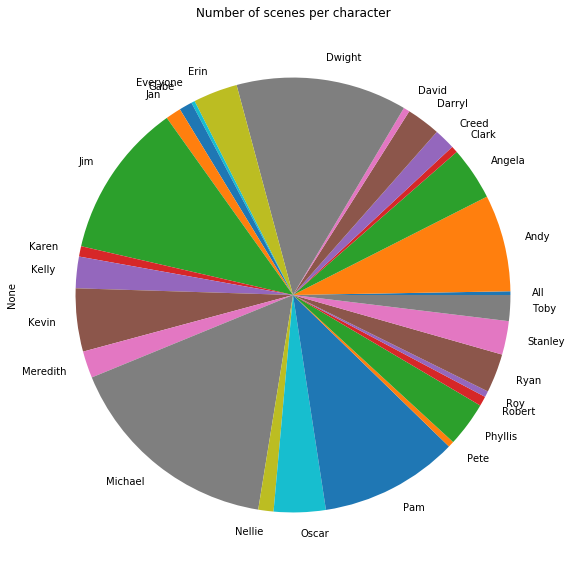

In [42]:
df_total = df_scene_total.sum(axis=1).plot(kind='pie', figsize=(10,10))
plt.title('Number of scenes per character')
plt.savefig('./Visualizations/Number of scenes per character.png')
plt.show()

In [43]:
df_season_total = df_scene_total.transpose()
df_season_total

speaker,All,Andy,Angela,Clark,Creed,Darryl,David,Dwight,Erin,Everyone,...,Nellie,Oscar,Pam,Pete,Phyllis,Robert,Roy,Ryan,Stanley,Toby
season,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,12.0,0.0,0.0,7.0,0.0,72.0,0.0,0.0,...,0.0,17.0,58.0,0.0,7.0,0.0,13.0,18.0,13.0,4.0
2,1.0,0.0,71.0,0.0,28.0,21.0,5.0,289.0,0.0,2.0,...,0.0,58.0,260.0,0.0,55.0,0.0,31.0,82.0,47.0,47.0
3,1.0,155.0,126.0,0.0,50.0,21.0,15.0,363.0,0.0,5.0,...,0.0,43.0,270.0,0.0,68.0,0.0,34.0,96.0,60.0,51.0
4,4.0,95.0,77.0,0.0,35.0,20.0,1.0,189.0,0.0,4.0,...,0.0,64.0,216.0,0.0,55.0,0.0,0.0,63.0,43.0,58.0
5,2.0,171.0,95.0,0.0,37.0,36.0,31.0,306.0,20.0,4.0,...,0.0,98.0,255.0,4.0,98.0,0.0,2.0,66.0,71.0,25.0
6,2.0,194.0,66.0,1.0,31.0,30.0,23.0,273.0,122.0,10.0,...,0.0,88.0,225.0,2.0,83.0,0.0,0.0,48.0,48.0,36.0
7,13.0,202.0,77.0,0.0,40.0,94.0,1.0,226.0,132.0,1.0,...,2.0,86.0,218.0,0.0,88.0,7.0,0.0,76.0,52.0,45.0
8,14.0,342.0,80.0,0.0,29.0,125.0,5.0,315.0,180.0,11.0,...,83.0,118.0,173.0,0.0,88.0,124.0,0.0,85.0,68.0,44.0
9,14.0,182.0,134.0,91.0,43.0,116.0,5.0,333.0,160.0,12.0,...,126.0,145.0,246.0,77.0,80.0,4.0,3.0,6.0,63.0,48.0


[]

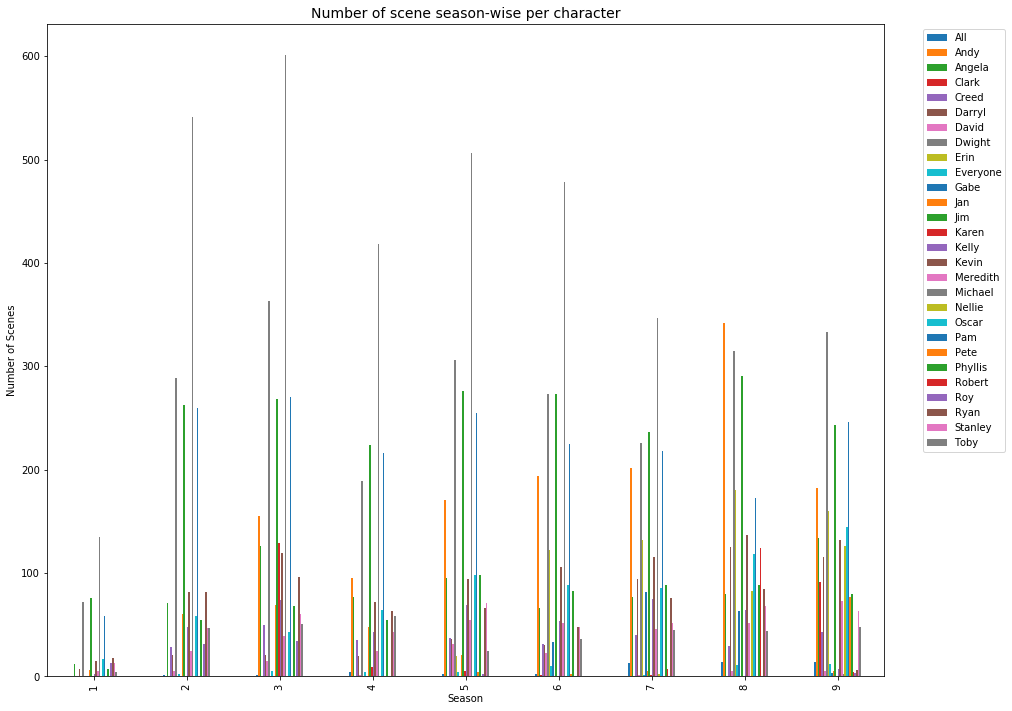

In [44]:
df_season_total.plot(kind='bar',figsize=(15,12))
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left')
plt.xlabel('Season',fontsize=10)
plt.ylabel('Number of Scenes')
plt.title('Number of scene season-wise per character',fontsize=14)
plt.savefig('./Visualizations/Number of scene season-wise per character.png')
plt.plot()

### Scenes

In [45]:
df_scenes = df.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','scene'],keep='first')
df_scenes

,season,episode,scene,line_text,speaker
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
5,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael
6,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael
15,1,1,4,"People say I am the best boss. They go, 'God w...",Michael
16,1,1,5,[singing] Shall I play for you? Pa rum pump um...,Dwight
...,...,...,...,...,...
59904,9,23,112,It all seems so very arbitrary. I applied for ...,Creed
59905,9,23,113,I just feel lucky that I got a chance to share...,Meredith
59906,9,23,114,I���m happy that this was all filmed so I can ...,Phyllis
59907,9,23,115,I sold paper at this company for 12 years. My ...,Jim


In [46]:
df_scenes.groupby(['season','episode'])['scene'].count().nlargest()

season  episode
5       1          116
9       23         116
4       14         103
        1           92
        4           92
Name: scene, dtype: int64

In [47]:
df_scenes.groupby(['season','episode'])['scene'].count().nsmallest()

season  episode
6       13         21
8       20         25
7       14         26
        16         26
5       12         27
Name: scene, dtype: int64

In [48]:
df_scenes_t = df_scenes.pivot_table(index='season',columns='episode',values='scene',aggfunc='count')
df_scenes_t

episode,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
season,,,,,,,,,,,,,,,,,,,,,
1,39.0,35.0,39.0,49.0,40.0,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62.0,45.0,50.0,53.0,43.0,37.0,44.0,41.0,38.0,70.0,...,45.0,44.0,42.0,39.0,59.0,57.0,NaN,NaN,NaN,NaN
3,61.0,51.0,66.0,55.0,60.0,52.0,51.0,76.0,32.0,88.0,...,61.0,57.0,59.0,75.0,60.0,77.0,88.0,NaN,NaN,NaN
4,92.0,80.0,90.0,92.0,46.0,50.0,61.0,46.0,31.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,116.0,30.0,49.0,50.0,54.0,51.0,36.0,29.0,30.0,49.0,...,32.0,35.0,46.0,40.0,39.0,46.0,32.0,35.0,54.0,42.0
6,31.0,34.0,28.0,78.0,32.0,31.0,39.0,44.0,51.0,50.0,...,45.0,35.0,52.0,37.0,50.0,42.0,42.0,44.0,NaN,NaN
7,37.0,42.0,43.0,36.0,35.0,53.0,48.0,42.0,38.0,35.0,...,30.0,39.0,35.0,29.0,53.0,39.0,32.0,80.0,NaN,NaN
8,60.0,40.0,42.0,55.0,52.0,52.0,36.0,45.0,48.0,55.0,...,29.0,40.0,41.0,25.0,51.0,38.0,36.0,44.0,NaN,NaN
9,56.0,47.0,48.0,39.0,39.0,48.0,39.0,36.0,40.0,52.0,...,36.0,35.0,49.0,46.0,53.0,70.0,116.0,NaN,NaN,NaN


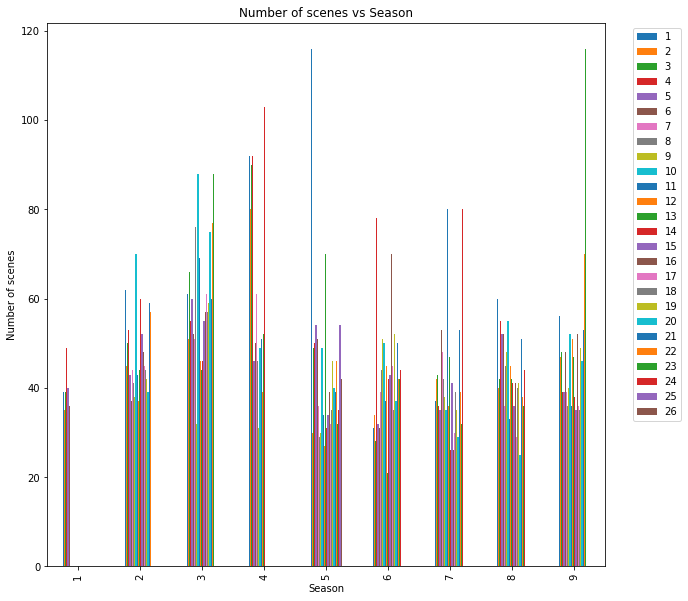

In [49]:
df_scenes_t.plot(kind='bar',figsize=(10,10))
plt.xlabel('Season')
plt.ylabel('Number of scenes')
plt.title('Number of scenes vs Season')
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left')
plt.savefig('./Visualizations/Number of scenes vs Season.png')
plt.show()

# EDA - IMDB

In [50]:
df_imdb = pd.read_csv('./dataset/TheOfficeIMDBPerEpisode.csv')

df_imdb.head()

,Season,Title,AirDate,Rating,Num_Votes,Description,DirectedBy,WrittenBy
0,1,Pilot,2005-03-24,7.5,4349,The premiere episode introduces the boss and s...,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,2005-03-29,8.3,4213,Michael's off color remark puts a sensitivity ...,Ken Kwapis,B. J. Novak
2,1,Health Care,2005-04-05,7.8,3536,Michael leaves Dwight in charge of picking the...,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,2005-04-12,8.1,3428,"Just for a laugh, Jim agrees to an alliance wi...",Bryan Gordon,Michael Schur
4,1,Basketball,2005-04-19,8.4,3745,Michael and his staff challenge the warehouse ...,Greg Daniels,Greg Daniels


In [51]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 8 columns):
Season         188 non-null int64
Title          188 non-null object
AirDate        188 non-null object
Rating         188 non-null float64
Num_Votes      188 non-null int64
Description    188 non-null object
DirectedBy     188 non-null object
WrittenBy      188 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 11.9+ KB


In [52]:
column_imdb = df_imdb.columns
column_imdb

Index(['Season', 'Title', 'AirDate', 'Rating', 'Num_Votes', 'Description',
       'DirectedBy', 'WrittenBy'],
      dtype='object')

In [53]:
df_imdb.drop('Description', inplace=True, axis=1)
df_imdb

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy
0,1,Pilot,2005-03-24,7.5,4349,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,B. J. Novak
2,1,Health Care,2005-04-05,7.8,3536,Ken Whittingham,Paul Lieberstein
3,1,The Alliance,2005-04-12,8.1,3428,Bryan Gordon,Michael Schur
4,1,Basketball,2005-04-19,8.4,3745,Greg Daniels,Greg Daniels
...,...,...,...,...,...,...,...
183,9,Stairmageddon,2013-04-11,8.0,1743,Matt Sohn,Dan Sterling
184,9,Paper Airplane,2013-04-25,8.0,1748,Jesse Peretz,Halsted Sullivan | Warren Lieberstein
185,9,Livin' the Dream,2013-05-02,9.0,2439,Jeffrey Blitz,Niki Schwartz-Wright
186,9,A.A.R.M.,2013-05-09,9.5,3401,David Rogers,Brent Forrester


In [54]:
df_imdb.groupby('Season')['Title'].count()

Season
1     6
2    22
3    23
4    14
5    26
6    26
7    24
8    24
9    23
Name: Title, dtype: int64

In [55]:
df.groupby('season')['episode'].nunique()

season
1     6
2    22
3    23
4    14
5    26
6    24
7    24
8    24
9    23
Name: episode, dtype: int64

There is a mismatch between episodes in Season 6

In [56]:
df_imdb[df_imdb['Season']==6]

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy
91,6,Gossip,2009-09-17,8.8,2504,Paul Lieberstein,Paul Lieberstein
92,6,The Meeting,2009-09-24,8.1,2057,Randall Einhorn,Aaron Shure
93,6,The Promotion,2009-10-01,8.0,2052,Jennifer Celotta,Jennifer Celotta
94,6,Niagara: Part 1,2009-10-08,9.4,4055,Paul Feig,Greg Daniels | Mindy Kaling
95,6,Niagara: Part 2,2009-10-08,9.4,2509,Paul Feig,Greg Daniels | Mindy Kaling
96,6,Mafia,2009-10-15,7.6,2156,David Rogers,Brent Forrester
97,6,The Lover,2009-10-22,8.6,2262,Lee Eisenberg,Lee Eisenberg | Gene Stupnitsky
98,6,Koi Pond,2009-10-29,8.2,2047,Reggie Hudlin,Warren Lieberstein | Halsted Sullivan
99,6,Double Date,2009-11-05,8.1,2018,Seth Gordon,Charlie Grandy
100,6,Murder,2009-11-12,8.6,2385,Greg Daniels,Daniel Chun


Episode Niagra and Delivery are split into two episodes in IMDB dataset.
I will take average of both of episodes

In [57]:
(df_imdb.loc[94]['Rating'] + df_imdb.loc[95]['Rating'])/2

9.4

In [58]:
df_imdb.loc[94,'Rating'] = (df_imdb.loc[94]['Rating'] + df_imdb.loc[95]['Rating'])/2
df_imdb.loc[94,'Num_Votes'] = df_imdb.loc[95]['Num_Votes']
df_imdb.loc[94,'Title'] = 'Niagara: Part 1 & 2'

In [59]:
df_imdb.loc[107,'Rating'] = (df_imdb.loc[107]['Rating'] + df_imdb.loc[108]['Rating'])/2
df_imdb.loc[107,'Num_Votes'] = df_imdb.loc[108]['Num_Votes']
df_imdb.loc[107,'Title'] = 'Delivery: Part 1 & 2'

In [60]:
df_imdb.drop(df_imdb.index[[95,108]], inplace=True)
df_imdb.reset_index(drop=True,inplace=True)

In [61]:
df_imdb[df_imdb['Season']==6]

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy
91,6,Gossip,2009-09-17,8.80,2504,Paul Lieberstein,Paul Lieberstein
92,6,The Meeting,2009-09-24,8.10,2057,Randall Einhorn,Aaron Shure
93,6,The Promotion,2009-10-01,8.00,2052,Jennifer Celotta,Jennifer Celotta
94,6,Niagara: Part 1 & 2,2009-10-08,9.40,2509,Paul Feig,Greg Daniels | Mindy Kaling
95,6,Mafia,2009-10-15,7.60,2156,David Rogers,Brent Forrester
96,6,The Lover,2009-10-22,8.60,2262,Lee Eisenberg,Lee Eisenberg | Gene Stupnitsky
97,6,Koi Pond,2009-10-29,8.20,2047,Reggie Hudlin,Warren Lieberstein | Halsted Sullivan
98,6,Double Date,2009-11-05,8.10,2018,Seth Gordon,Charlie Grandy
99,6,Murder,2009-11-12,8.60,2385,Greg Daniels,Daniel Chun
100,6,Shareholder Meeting,2009-11-19,8.20,2034,Charles McDougall,Justin Spitzer


In [62]:
df_imdb.groupby('Season')['Title'].count()

Season
1     6
2    22
3    23
4    14
5    26
6    24
7    24
8    24
9    23
Name: Title, dtype: int64

In [63]:
df_imdb.groupby('Season').mean()

,Rating,Num_Votes
Season,,
1,7.983333,3773.833333
2,8.450000,3069.045455
3,8.600000,2835.826087
4,8.564286,2816.214286
5,8.496154,2524.000000
6,8.143750,2111.041667
7,8.320833,2398.500000
8,7.629167,1803.666667
9,7.921739,2174.913043


Rating dropped in Season 8 and 9 after Michael's exit. Overall votes decreases as the series proceeds

In [64]:
df_imdb['AirDate'] = pd.to_datetime(df_imdb['AirDate'])
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 7 columns):
Season        186 non-null int64
Title         186 non-null object
AirDate       186 non-null datetime64[ns]
Rating        186 non-null float64
Num_Votes     186 non-null int64
DirectedBy    186 non-null object
WrittenBy     186 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 10.3+ KB


In [65]:
df_imdb['Year'] = df_imdb['AirDate'].dt.year
df_imdb['Month'] = df_imdb['AirDate'].dt.month
df_imdb['Day'] = df_imdb['AirDate'].dt.weekday
df_imdb.head(10)

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day
0,1,Pilot,2005-03-24,7.5,4349,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,2005,3,3
1,1,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,B. J. Novak,2005,3,1
2,1,Health Care,2005-04-05,7.8,3536,Ken Whittingham,Paul Lieberstein,2005,4,1
3,1,The Alliance,2005-04-12,8.1,3428,Bryan Gordon,Michael Schur,2005,4,1
4,1,Basketball,2005-04-19,8.4,3745,Greg Daniels,Greg Daniels,2005,4,1
5,1,Hot Girl,2005-04-26,7.8,3372,Amy Heckerling,Mindy Kaling,2005,4,1
6,2,The Dundies,2005-09-20,8.7,3780,Greg Daniels,Mindy Kaling,2005,9,1
7,2,Sexual Harassment,2005-09-27,8.2,3218,Ken Kwapis,B. J. Novak,2005,9,1
8,2,Office Olympics,2005-10-04,8.4,3218,Paul Feig,Michael Schur,2005,10,1
9,2,The Fire,2005-10-11,8.4,3183,Ken Kwapis,B. J. Novak,2005,10,1


January is 1, December is 12.
Monday is 0, Sunday is 6

In [66]:
df_imdb['Day'].value_counts()

3    170
1     15
6      1
Name: Day, dtype: int64

In [67]:
df_imdb[df_imdb['Day']==6]

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day
77,5,Stress Relief,2009-02-01,9.7,7058,Jeffrey Blitz,Paul Lieberstein,2009,2,6


In [68]:
df_imdb[df_imdb['Day']==1]

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day
1,1,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,B. J. Novak,2005,3,1
2,1,Health Care,2005-04-05,7.8,3536,Ken Whittingham,Paul Lieberstein,2005,4,1
3,1,The Alliance,2005-04-12,8.1,3428,Bryan Gordon,Michael Schur,2005,4,1
4,1,Basketball,2005-04-19,8.4,3745,Greg Daniels,Greg Daniels,2005,4,1
5,1,Hot Girl,2005-04-26,7.8,3372,Amy Heckerling,Mindy Kaling,2005,4,1
6,2,The Dundies,2005-09-20,8.7,3780,Greg Daniels,Mindy Kaling,2005,9,1
7,2,Sexual Harassment,2005-09-27,8.2,3218,Ken Kwapis,B. J. Novak,2005,9,1
8,2,Office Olympics,2005-10-04,8.4,3218,Paul Feig,Michael Schur,2005,10,1
9,2,The Fire,2005-10-11,8.4,3183,Ken Kwapis,B. J. Novak,2005,10,1
10,2,Halloween,2005-10-18,8.1,2992,Paul Feig,Greg Daniels,2005,10,1


In [69]:
df_imdb[df_imdb['Title']=='Pilot']

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day
0,1,Pilot,2005-03-24,7.5,4349,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,2005,3,3


In [70]:
df_imdb[df_imdb['Title']=='Finale']

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day
185,9,Finale,2013-05-16,9.8,9269,Ken Kwapis,Greg Daniels,2013,5,3


Pilot of The Series aired on Thursday March 24th 2005 , rest of Seaon 1 and some episodes of Season 2 aired on Monday. Majority of Series aired on Thurday. Only episode to air on Sunday is "Stress Relief". The Finale aired on May 16th 2013.

In [71]:
df_month = df_imdb.groupby('Month')['Title'].count()
df_month

Month
1     19
2     21
3     18
4     27
5     21
9     14
10    29
11    26
12    11
Name: Title, dtype: int64

[]

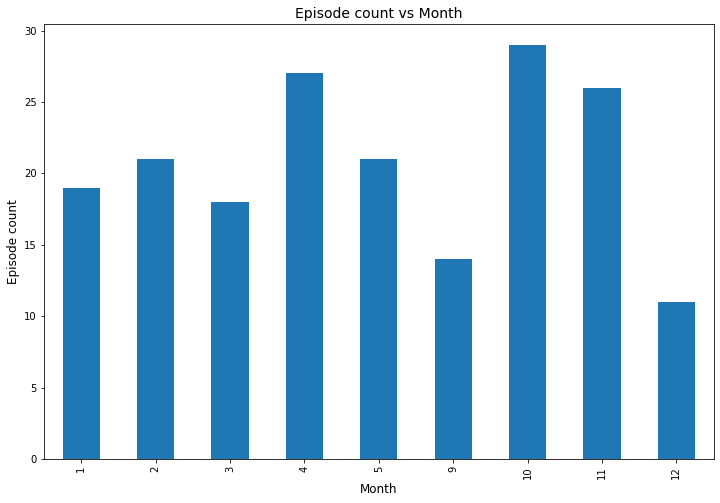

In [72]:
df_month.plot(kind='bar',figsize=(12,8))
plt.xlabel('Month',fontsize=12)
plt.ylabel('Episode count',fontsize=12)
plt.title('Episode count vs Month',fontsize=14)
plt.savefig('./Visualizations/Episode count vs Month.png')
plt.plot()

In [73]:
df_imdb.groupby('Year')['Title'].count()

Year
2005    16
2006    22
2007    21
2008    16
2009    28
2010    23
2011    23
2012    23
2013    14
Name: Title, dtype: int64

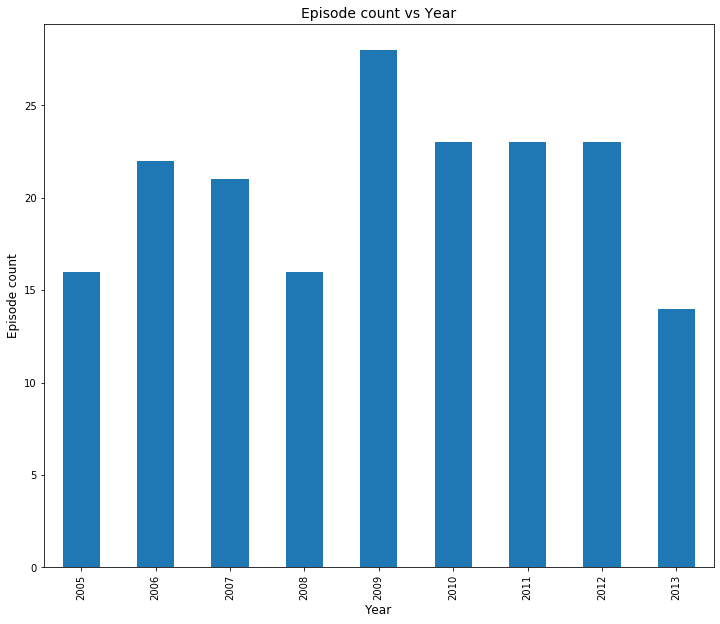

In [74]:
df_imdb.groupby('Year')['Title'].count().plot(kind='bar',figsize=(12,10))
plt.title('Episode count vs Year',fontsize=14)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Episode count',fontsize=12)
plt.savefig('./Visualizations/Episode count vs Year.png')
plt.show()

In [75]:
df_year = df_imdb.pivot_table(index='Season',columns='Year',values='Title',aggfunc='count')
df_year

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013
Season,,,,,,,,,
1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8.0,6.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,10.0,16.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,11.0,13.0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,10.0,14.0,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,14.0


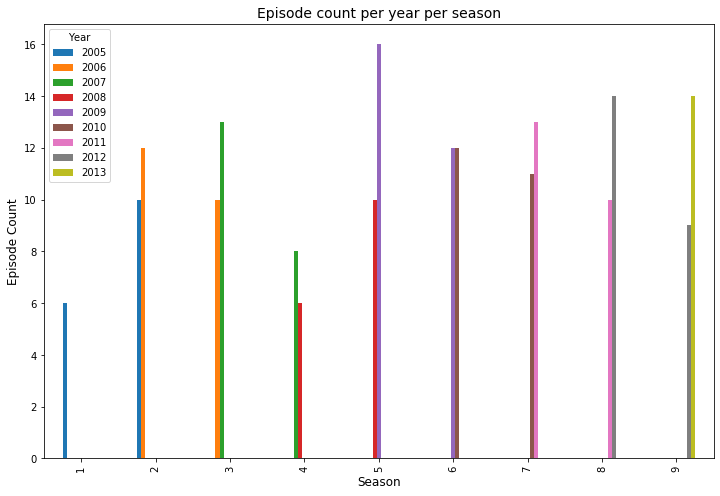

In [76]:
df_year.plot(kind='bar', figsize=(12,8))
plt.xlabel('Season', fontsize=12)
plt.ylabel('Episode Count', fontsize=12)
plt.title('Episode count per year per season',fontsize=14)
plt.savefig('./Visualizations/Episode count per year per season.png')
plt.show()

In [77]:
df_imdb['Difference'] = df_imdb.groupby('Season')['AirDate'].apply(lambda x: x.dt.date - x.min().date()).astype('timedelta64[D]')
df_imdb.head(10)

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
0,1,Pilot,2005-03-24,7.5,4349,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,2005,3,3,0.0
1,1,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,B. J. Novak,2005,3,1,5.0
2,1,Health Care,2005-04-05,7.8,3536,Ken Whittingham,Paul Lieberstein,2005,4,1,12.0
3,1,The Alliance,2005-04-12,8.1,3428,Bryan Gordon,Michael Schur,2005,4,1,19.0
4,1,Basketball,2005-04-19,8.4,3745,Greg Daniels,Greg Daniels,2005,4,1,26.0
5,1,Hot Girl,2005-04-26,7.8,3372,Amy Heckerling,Mindy Kaling,2005,4,1,33.0
6,2,The Dundies,2005-09-20,8.7,3780,Greg Daniels,Mindy Kaling,2005,9,1,0.0
7,2,Sexual Harassment,2005-09-27,8.2,3218,Ken Kwapis,B. J. Novak,2005,9,1,7.0
8,2,Office Olympics,2005-10-04,8.4,3218,Paul Feig,Michael Schur,2005,10,1,14.0
9,2,The Fire,2005-10-11,8.4,3183,Ken Kwapis,B. J. Novak,2005,10,1,21.0


In [78]:
df_imdb.groupby('Season')['Difference'].nlargest(1).sort_values(ascending=False)

Season     
6       114    245.0
9       185    238.0
7       138    238.0
3       50     238.0
2       27     233.0
8       162    231.0
5       90     231.0
4       64     231.0
1       5       33.0
Name: Difference, dtype: float64

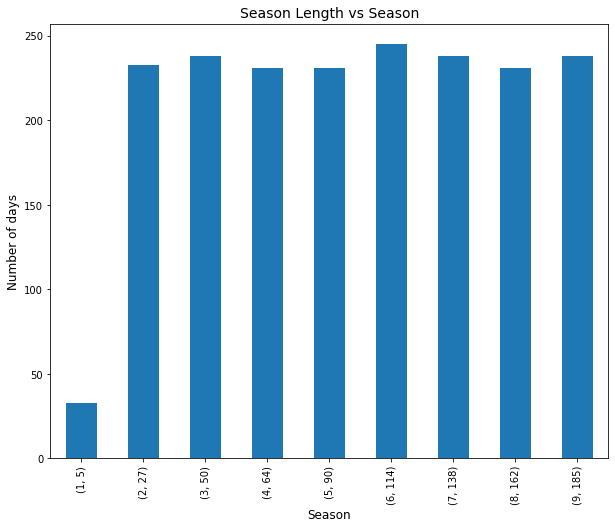

In [79]:
df_imdb.groupby('Season')['Difference'].nlargest(1).plot(kind='bar',figsize=(10,8))
plt.xlabel('Season',fontsize=12)
plt.ylabel('Number of days',fontsize=12)
plt.title('Season Length vs Season',fontsize=14)
plt.savefig('./Visualizations/Season Length vs Season.png')
plt.show()

All the season ran for almost same number of days, despite season 3 having only 14 episodes.Only exception is Season 1 with only 6 episodes

### Rating

In [80]:
df_imdb['Rating'].describe()

count    186.000000
mean       8.241129
std        0.575386
min        6.600000
25%        7.800000
50%        8.200000
75%        8.600000
max        9.800000
Name: Rating, dtype: float64

In [81]:
df_imdb[df_imdb['Rating']==6.6]

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
157,8,Get the Girl,2012-03-15,6.6,1944,Rainn Wilson,Charlie Grandy,2012,3,3,175.0


In [82]:
df_imdb[df_imdb['Rating']==9.8]

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
135,7,"Goodbye, Michael",2011-04-28,9.8,6909,Paul Feig,Greg Daniels,2011,4,3,217.0
185,9,Finale,2013-05-16,9.8,9269,Ken Kwapis,Greg Daniels,2013,5,3,238.0


Series has a mean rating of 8.24. Lowest rated episode is from Season 8 "Get the Girl". There are two episode with highest rating "Goodbye Michael" and "Finale". PS: Both are my favourite

In [83]:
df_imdb.groupby('Season')['Rating'].mean()

Season
1    7.983333
2    8.450000
3    8.600000
4    8.564286
5    8.496154
6    8.143750
7    8.320833
8    7.629167
9    7.921739
Name: Rating, dtype: float64

In [84]:
df_imdb.groupby('Season')['Rating'].mean()

Season
1    7.983333
2    8.450000
3    8.600000
4    8.564286
5    8.496154
6    8.143750
7    8.320833
8    7.629167
9    7.921739
Name: Rating, dtype: float64

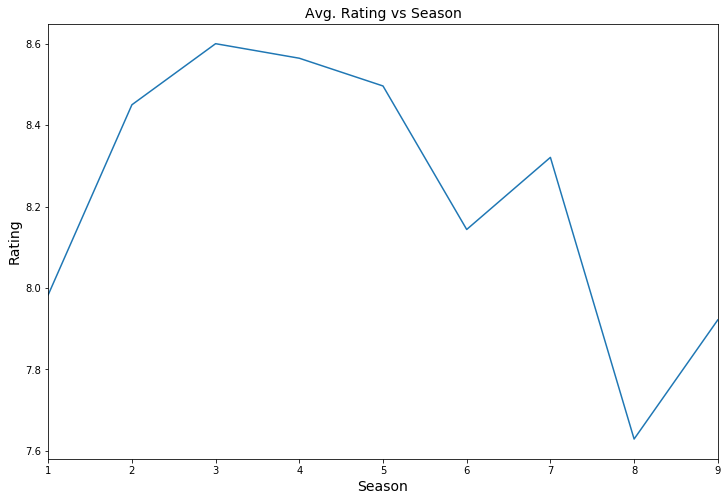

In [85]:
df_imdb.groupby('Season')['Rating'].mean().plot(kind='line',figsize=(12,8))
plt.xlabel('Season',fontsize=14)
plt.ylabel('Rating',fontsize=14)
plt.title('Avg. Rating vs Season',fontsize=14)
plt.savefig('./Visualizations/Avg. Rating vs Season.png')
plt.show()

Point to note - The rating of an episode is not an average of all ratings received from the voters. IMDB uses weighted average system.
Rating decreases for final two seasons after Michael's exit. Season 8 being the lowest rated. Highest being season 3 followed by season 4

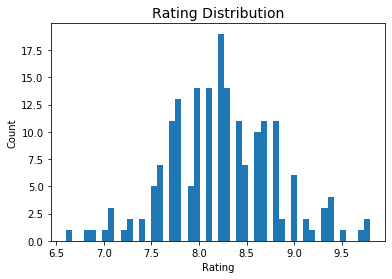

In [86]:
plt.hist(df_imdb['Rating'],bins=50)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution',fontsize=14)
plt.savefig('./Visualizations/Rating Distribution.png')
plt.show()

In [87]:
df_imdb['Rating'].median()

8.2

We can see peaks between 8.0 and 8.5. Median around 8.2

In [88]:
df_imdb[df_imdb['Rating']>df_imdb['Rating'].mean()]

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
1,1,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,B. J. Novak,2005,3,1,5.0
4,1,Basketball,2005-04-19,8.4,3745,Greg Daniels,Greg Daniels,2005,4,1,26.0
6,2,The Dundies,2005-09-20,8.7,3780,Greg Daniels,Mindy Kaling,2005,9,1,0.0
8,2,Office Olympics,2005-10-04,8.4,3218,Paul Feig,Michael Schur,2005,10,1,14.0
9,2,The Fire,2005-10-11,8.4,3183,Ken Kwapis,B. J. Novak,2005,10,1,21.0
...,...,...,...,...,...,...,...,...,...,...,...
138,7,Search Committee,2011-05-19,8.8,2344,Jeffrey Blitz,Paul Lieberstein,2011,5,3,238.0
171,9,Dwight Christmas,2012-12-06,8.3,1918,Charles McDougall,Robert Padnick,2012,12,3,77.0
183,9,Livin' the Dream,2013-05-02,9.0,2439,Jeffrey Blitz,Niki Schwartz-Wright,2013,5,3,224.0
184,9,A.A.R.M.,2013-05-09,9.5,3401,David Rogers,Brent Forrester,2013,5,3,231.0


86 Episodes have rating greater than mean rating (8.2)

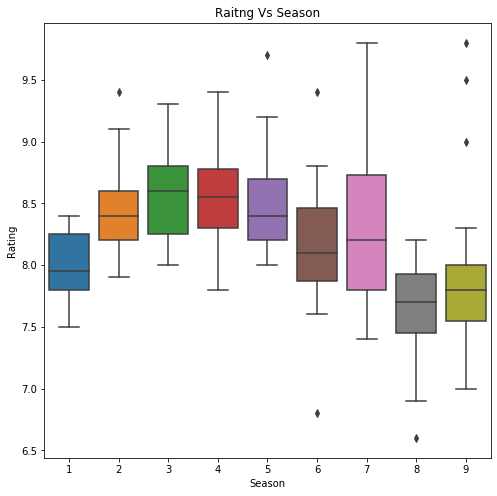

In [89]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df_imdb['Season'], y=df_imdb['Rating'])
plt.title('Raitng Vs Season')
plt.savefig('./Visualizations/Rating Vs Season (Boxplot).png')
plt.show()

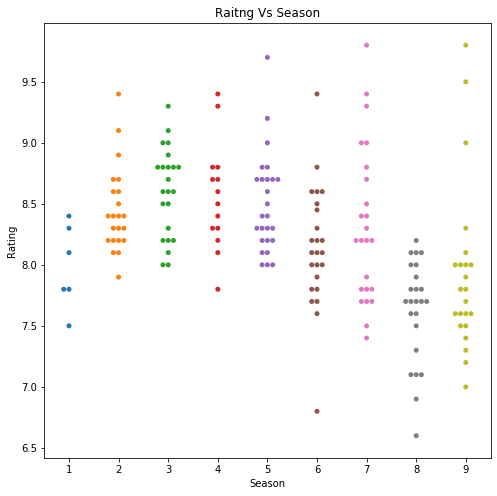

In [90]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=df_imdb['Season'], y=df_imdb['Rating'])
plt.title('Raitng Vs Season')
plt.savefig('./Visualizations/Rating Vs Season (Swarmplot).png')
plt.show()

Seasons 2 to 5 ratings have been steady and good, above 8 for most time; season 6 and 7 half the episodes are highly rated while the other half dip below 8,also a general decline from the previously steady rated seasons begins to be seen; season 8 and 9 have consistently low ratings except for 3 episodes in season 9. Most of the low ratings below the median rating of 8.2 is seen concentrated from season 6 onwards.

### Directors

In [91]:
df_imdb['DirectedBy'].nunique()

55

In [92]:
df_imdb['DirectedBy'].value_counts()

Randall Einhorn      15
Paul Feig            14
Ken Kwapis           13
Greg Daniels         13
Jeffrey Blitz        11
David Rogers          9
Ken Whittingham       9
Charles McDougall     8
Matt Sohn             8
Paul Lieberstein      7
B. J. Novak           5
Brent Forrester       4
Tucker Gates          4
Troy Miller           3
John Krasinski        3
Jennifer Celotta      3
Rainn Wilson          3
Steve Carell          3
Harold Ramis          3
Rodman Flender        2
Seth Gordon           2
Joss Whedon           2
Dennie Gordon         2
Claire Scanlon        2
Jason Reitman         2
Ed Helms              2
Bryan Gordon          2
Julian Farino         2
Victor Nelli, Jr.     2
Mindy Kaling          2
Dean Holland          2
Reggie Hudlin         1
Asaad Kelada          1
Alex Hardcastle       1
Daniel Chun           1
Craig Zisk            1
Miguel Arteta         1
Charlie Grandy        1
Stephen Merchant      1
Bryan Cranston        1
Jesse Peretz          1
Marc Webb       

Characters of the show like Paul Lieberstein(Toby),B. J. Novak(Ryan),Rainn Wilson(Dwight),Steve Carell(Michael),John Krasinski(Jim),Ed Helms(Andy),Mindy Kaling(Kelly) and Brian Baumgartner(Kevin) directed episodes apart from acting too.

In [93]:
df_imdb.groupby('Season')['DirectedBy'].nunique()

Season
1     5
2     8
3    12
4    11
5    16
6    19
7    20
8    16
9    18
Name: DirectedBy, dtype: int64

In [94]:
df_imdb.groupby('DirectedBy')['Rating'].agg(['mean','min','max'])

,mean,min,max
DirectedBy,,,
Alex Hardcastle,7.400000,7.4,7.40
Amy Heckerling,7.800000,7.8,7.80
Asaad Kelada,8.000000,8.0,8.00
B. J. Novak,7.960000,7.7,8.30
Brent Forrester,7.925000,7.8,8.30
Brian Baumgartner,8.100000,8.1,8.10
Bryan Cranston,7.800000,7.8,7.80
Bryan Gordon,8.600000,8.1,9.10
Charles McDougall,8.362500,8.0,8.90


In [95]:
dir_top = df_imdb['DirectedBy'].value_counts().head(10).index.tolist()
dir_top

['Randall Einhorn',
 'Paul Feig',
 'Ken Kwapis',
 'Greg Daniels',
 'Jeffrey Blitz',
 'David Rogers',
 'Ken Whittingham',
 'Charles McDougall',
 'Matt Sohn',
 'Paul Lieberstein']

In [96]:
df_dir = df_imdb[df_imdb['DirectedBy'].isin(dir_top)]
df_dir

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
0,1,Pilot,2005-03-24,7.5,4349,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,2005,3,3,0.0
1,1,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,B. J. Novak,2005,3,1,5.0
2,1,Health Care,2005-04-05,7.8,3536,Ken Whittingham,Paul Lieberstein,2005,4,1,12.0
4,1,Basketball,2005-04-19,8.4,3745,Greg Daniels,Greg Daniels,2005,4,1,26.0
6,2,The Dundies,2005-09-20,8.7,3780,Greg Daniels,Mindy Kaling,2005,9,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
179,9,The Farm,2013-03-14,7.5,1931,Paul Lieberstein,Paul Lieberstein,2013,3,3,175.0
181,9,Stairmageddon,2013-04-11,8.0,1743,Matt Sohn,Dan Sterling,2013,4,3,203.0
183,9,Livin' the Dream,2013-05-02,9.0,2439,Jeffrey Blitz,Niki Schwartz-Wright,2013,5,3,224.0
184,9,A.A.R.M.,2013-05-09,9.5,3401,David Rogers,Brent Forrester,2013,5,3,231.0


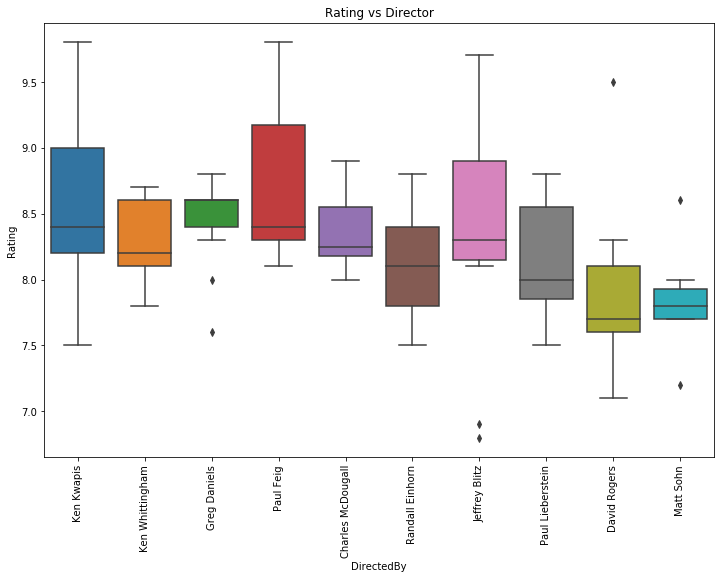

In [97]:
plt.figure(figsize=(12,8))
sns.boxplot(x='DirectedBy',y='Rating',data=df_dir)
plt.title('Rating vs Director')
plt.xticks(rotation=90)
plt.savefig('./Visualizations/Rating vs Director.png')
plt.show()

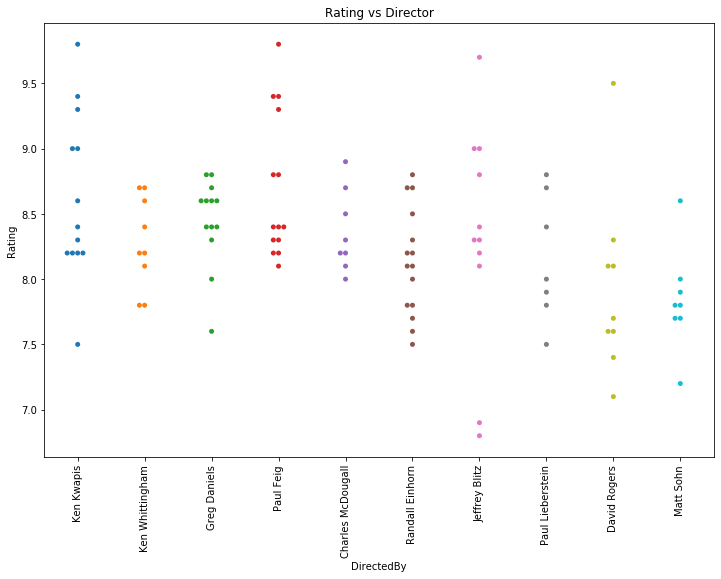

In [98]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='DirectedBy',y='Rating',data=df_dir)
plt.title('Rating vs Director')
plt.xticks(rotation=90)
plt.savefig('./Visualizations/Rating vs Director(Swarmplot).png')
plt.show()

Greg Daniels, who is also show's co-creator has highest median rating Paul Feig has all episodes above 8. Matt Schon has the lowest ratng

In [99]:
df_imdb[df_imdb['Rating']==df_imdb['Rating'].min()]

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
157,8,Get the Girl,2012-03-15,6.6,1944,Rainn Wilson,Charlie Grandy,2012,3,3,175.0


In [100]:
df_imdb[df_imdb['Rating']==df_imdb['Rating'].max()]

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
135,7,"Goodbye, Michael",2011-04-28,9.8,6909,Paul Feig,Greg Daniels,2011,4,3,217.0
185,9,Finale,2013-05-16,9.8,9269,Ken Kwapis,Greg Daniels,2013,5,3,238.0


In [101]:
df_imdb[df_imdb['DirectedBy']=='B. J. Novak']

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
101,6,Scott's Tots,2009-12-03,8.3,2345,B. J. Novak,Gene Stupnitsky | Lee Eisenberg,2009,12,3,77.0
127,7,The Seminar,2011-01-27,7.7,1904,B. J. Novak,Steve Hely,2011,1,3,126.0
139,8,The List,2011-09-22,8.2,2102,B. J. Novak,B. J. Novak,2011,9,3,0.0
149,8,Trivia,2012-01-12,7.9,1742,B. J. Novak,Steve Hely,2012,1,3,112.0
162,8,Free Family Portrait Studio,2012-05-10,7.7,1702,B. J. Novak,B. J. Novak,2012,5,3,231.0


In [102]:
df_imdb[df_imdb['DirectedBy']=='Steve Carell']

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
87,5,Broke,2009-04-23,9.2,2942,Steve Carell,Charlie Grandy,2009,4,3,210.0
110,6,Secretary's Day,2010-04-22,7.9,1892,Steve Carell,Mindy Kaling,2010,4,3,217.0
132,7,Garage Sale,2011-03-24,9.3,3216,Steve Carell,Jon Vitti,2011,3,3,182.0


In [103]:
df_imdb[df_imdb['DirectedBy']=='John Krasinski']

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
104,6,Sabre,2010-02-04,7.7,1963,John Krasinski,Jennifer Celotta,2010,2,3,140.0
141,8,Lotto,2011-10-06,7.3,1858,John Krasinski,Charlie Grandy,2011,10,3,14.0
168,9,The Boat,2012-11-08,7.7,1720,John Krasinski,Dan Sterling,2012,11,3,49.0


In [104]:
df_imdb[df_imdb['DirectedBy']=='Ed Helms']

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
148,8,Christmas Wishes,2011-12-08,8.0,1795,Ed Helms,Mindy Kaling,2011,12,3,77.0
158,8,Welcome Party,2012-04-12,7.1,1739,Ed Helms,Steve Hely,2012,4,3,203.0


In [105]:
df_imdb[df_imdb['DirectedBy']=='Brian Baumgartner']

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
154,8,After Hours,2012-02-23,8.1,1828,Brian Baumgartner,Halsted Sullivan | Warren Lieberstein,2012,2,3,154.0


In [106]:
df_imdb[df_imdb['DirectedBy']=='Mindy Kaling']

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
111,6,Body Language,2010-04-29,8.0,1922,Mindy Kaling,Justin Spitzer,2010,4,3,224.0
134,7,Michael's Last Dundies,2011-04-21,9.0,2598,Mindy Kaling,Mindy Kaling,2011,4,3,210.0


In [107]:
df_imdb[df_imdb['DirectedBy']=='Jon Favreau']

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
178,9,Moving On,2013-02-14,8.1,1839,Jon Favreau,Graham Wagner,2013,2,3,147.0


In [108]:
df_imdb[df_imdb['DirectedBy']=='Joss Whedon']

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
43,3,Business School,2007-02-15,8.9,3028,Joss Whedon,Brent Forrester,2007,2,3,147.0
56,4,Branch Wars,2007-11-01,8.5,2545,Joss Whedon,Mindy Kaling,2007,11,3,35.0


In [109]:
df_imdb[df_imdb['DirectedBy']=='Bryan Cranston']

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
166,9,Work Bus,2012-10-18,7.8,1809,Bryan Cranston,Brent Forrester,2012,10,3,28.0


Lowest rated episodes was "Get the Girl" directed by none other than Rainn Wilson aka Mr. Dwight Shrute. Highest rated "Goodbye, Michael" and "Finale" was directed by Paul Feig and Ken Kwapis respectively. Also some of the famous directors, Joss Whedon (Still angry about Justice League) and Jon Favreau (The Mandalorian fame) also directed episodes. Breaking Bad fame actor/director Bryan Cranston also directed an episode,"Work Bus

### Actor who directed

In [110]:
dir_list = ['B. J. Novak','Steve Carell','Rainn Wilson','John Krasinski','Mindy Kaling','Ed Helms','Brian Baumgartner']

In [111]:
df_actor = df_imdb[df_imdb['DirectedBy'].isin(dir_list)]
df_actor

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
87,5,Broke,2009-04-23,9.2,2942,Steve Carell,Charlie Grandy,2009,4,3,210.0
101,6,Scott's Tots,2009-12-03,8.3,2345,B. J. Novak,Gene Stupnitsky | Lee Eisenberg,2009,12,3,77.0
104,6,Sabre,2010-02-04,7.7,1963,John Krasinski,Jennifer Celotta,2010,2,3,140.0
110,6,Secretary's Day,2010-04-22,7.9,1892,Steve Carell,Mindy Kaling,2010,4,3,217.0
111,6,Body Language,2010-04-29,8.0,1922,Mindy Kaling,Justin Spitzer,2010,4,3,224.0
112,6,The Cover-Up,2010-05-06,8.2,1920,Rainn Wilson,Gene Stupnitsky | Lee Eisenberg,2010,5,3,231.0
125,7,Classy Christmas,2010-12-09,9.0,2514,Rainn Wilson,Mindy Kaling,2010,12,3,77.0
127,7,The Seminar,2011-01-27,7.7,1904,B. J. Novak,Steve Hely,2011,1,3,126.0
132,7,Garage Sale,2011-03-24,9.3,3216,Steve Carell,Jon Vitti,2011,3,3,182.0
134,7,Michael's Last Dundies,2011-04-21,9.0,2598,Mindy Kaling,Mindy Kaling,2011,4,3,210.0


In [112]:
len(df_actor)

19

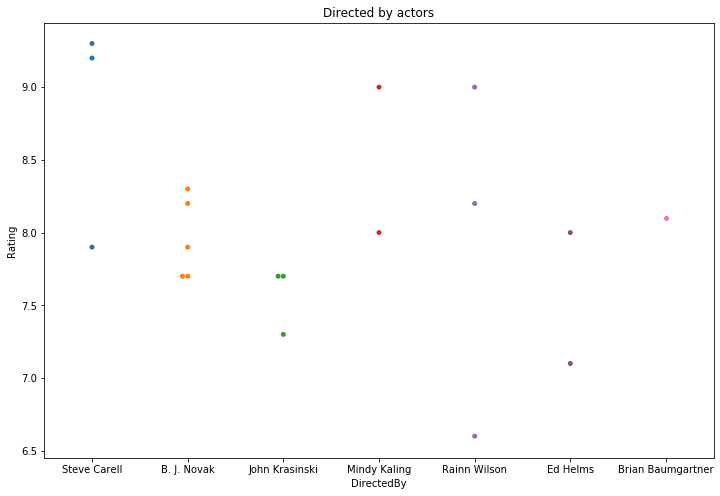

In [113]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='DirectedBy',y='Rating',data=df_actor)
plt.title('Directed by actors')
plt.savefig('./Visualizations/Directed by actors.png')
plt.show()

There are not much episodes directed by actors of series to draw a conclusion but there seems no correlation between episodes directed by actors and rating. Steve Carell has 2 episodes in 9+ rating window. All of John Krasinski episodes are lo

### Writers 

In [114]:
df_imdb['WrittenBy'].nunique()

47

In [115]:
df_imdb['WrittenBy'].value_counts()

Mindy Kaling                                        20
B. J. Novak                                         15
Paul Lieberstein                                    13
Brent Forrester                                      9
Greg Daniels                                         9
Justin Spitzer                                       9
Gene Stupnitsky | Lee Eisenberg                      8
Jennifer Celotta                                     8
Charlie Grandy                                       7
Michael Schur                                        7
Daniel Chun                                          6
Aaron Shure                                          6
Lee Eisenberg | Gene Stupnitsky                      5
Carrie Kemper                                        4
Owen Ellickson                                       4
Robert Padnick                                       4
Warren Lieberstein | Halsted Sullivan                4
Steve Hely                                           3
Allison Si

In [116]:
df_imdb['WrittenBy'].replace(['Lee Eisenberg | Gene Stupnitsky'], "Gene Stupnitsky | Lee Eisenberg", inplace=True)
df_imdb['WrittenBy'].replace(['Warren Lieberstein | Halsted Sullivan'], "Halsted Sullivan | Warren Lieberstein", inplace=True)
df_imdb['WrittenBy'].replace(['Michael Schur | Lee Eisenberg | Gene Stupnitsky'], "Lee Eisenberg | Gene Stupnitsky | Michael Schur", inplace=True)
df_imdb['WrittenBy'].replace(['Justin Spitzer | Brent Forrester'], "Brent Forrester | Justin Spitzer", inplace=True)
df_imdb['WrittenBy'].replace(['Ricky Gervais |Stephen Merchant and Greg Daniels'], "Ricky Gervais | Stephen Merchant | Greg Daniels", inplace=True)

In [117]:
df_imdb['WrittenBy'].nunique()

43

In [118]:
df_imdb['WrittenBy'].value_counts()

Mindy Kaling                                       20
B. J. Novak                                        15
Gene Stupnitsky | Lee Eisenberg                    13
Paul Lieberstein                                   13
Brent Forrester                                     9
Justin Spitzer                                      9
Greg Daniels                                        9
Jennifer Celotta                                    8
Michael Schur                                       7
Halsted Sullivan | Warren Lieberstein               7
Charlie Grandy                                      7
Aaron Shure                                         6
Daniel Chun                                         6
Robert Padnick                                      4
Owen Ellickson                                      4
Carrie Kemper                                       4
Allison Silverman                                   3
Steve Hely                                          3
Dan Greaney                 

Mindy Kaling(Kelly), B. J. Novak(Ryan) and Paul Lieberstein(Toby) were regular writers of the show, having written the highest number of episodes!Steve Carell also wrote couple of episodes

In [119]:
df_imdb.groupby('Season')['WrittenBy'].nunique()

Season
1     6
2     9
3    15
4    11
5    14
6    14
7    16
8    15
9    14
Name: WrittenBy, dtype: int64

Season 7 has the highest number of Writers. Although season 2 has 22 episodes it has only 9 writers

In [120]:
writer_list = df_imdb['WrittenBy'].value_counts().head(13).index.tolist()
writer_list

['Mindy Kaling',
 'B. J. Novak',
 'Gene Stupnitsky | Lee Eisenberg',
 'Paul Lieberstein',
 'Brent Forrester',
 'Justin Spitzer',
 'Greg Daniels',
 'Jennifer Celotta',
 'Michael Schur',
 'Halsted Sullivan | Warren Lieberstein',
 'Charlie Grandy',
 'Aaron Shure',
 'Daniel Chun']

In [121]:
df_writer = df_imdb[df_imdb['WrittenBy'].isin(writer_list)]
df_writer

,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
1,1,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,B. J. Novak,2005,3,1,5.0
2,1,Health Care,2005-04-05,7.8,3536,Ken Whittingham,Paul Lieberstein,2005,4,1,12.0
3,1,The Alliance,2005-04-12,8.1,3428,Bryan Gordon,Michael Schur,2005,4,1,19.0
4,1,Basketball,2005-04-19,8.4,3745,Greg Daniels,Greg Daniels,2005,4,1,26.0
5,1,Hot Girl,2005-04-26,7.8,3372,Amy Heckerling,Mindy Kaling,2005,4,1,33.0
...,...,...,...,...,...,...,...,...,...,...,...
166,9,Work Bus,2012-10-18,7.8,1809,Bryan Cranston,Brent Forrester,2012,10,3,28.0
179,9,The Farm,2013-03-14,7.5,1931,Paul Lieberstein,Paul Lieberstein,2013,3,3,175.0
182,9,Paper Airplane,2013-04-25,8.0,1748,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,2013,4,3,217.0
184,9,A.A.R.M.,2013-05-09,9.5,3401,David Rogers,Brent Forrester,2013,5,3,231.0


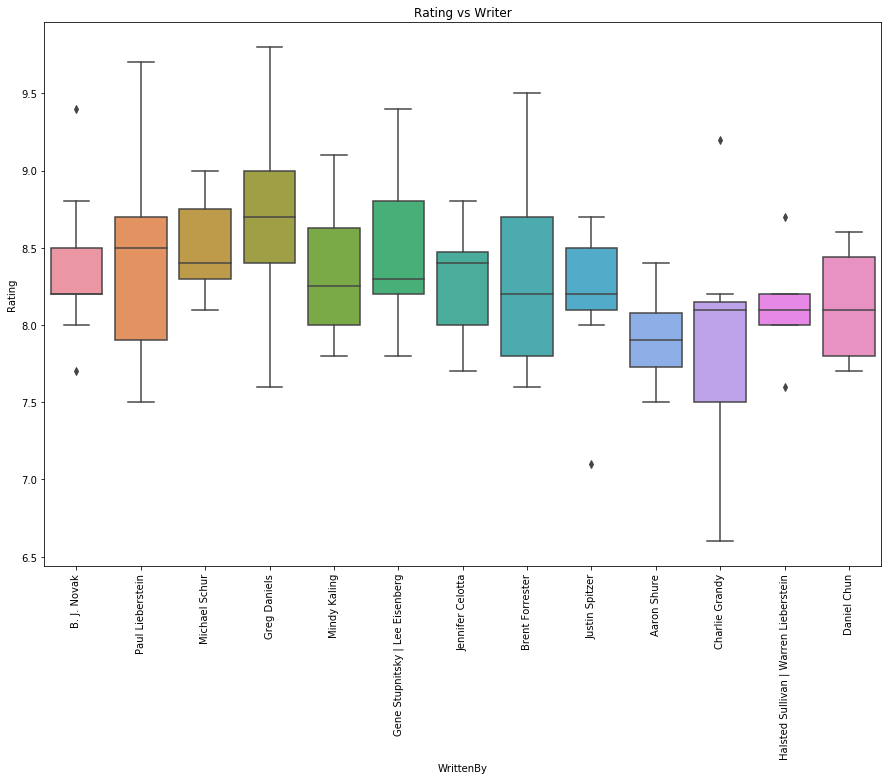

In [122]:
plt.figure(figsize=(15,10))
sns.boxplot(x='WrittenBy',y='Rating',data=df_writer)
plt.title('Rating vs Writer')
plt.xticks(rotation=90)
plt.savefig('./Visualizations/Rating vs Writer.png')
plt.show()

Greg Daniels has the highest median rating of 8.7,followed by Paul Lieberstein who has the median rating of 8.5. Michael Schur and Justin Spitzer have all episodes rated above 8(except one from season 8) while Mindy Kaling and B.J.Novak have a similar ratings distribution. Aaron Shure has the lowest median rating of 7.9

### Combining both dataset

In [123]:
df_ep = df.drop_duplicates(['season','episode'])
df_ep

,season,episode,scene,line_text,speaker
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
270,1,2,1,"Hey, uh, can I help you out in here?",Michael
567,1,3,1,Pam. Pamela. Pam-elama-ding-dong. Making copies.,Michael
891,1,4,1,Michael!?,Dwight
1251,1,5,1,"[to Jim]: Hey, you ready?",Michael
...,...,...,...,...,...
57997,9,19,1,[humming] What the hell? No. This is NOT happe...,Stanley
58270,9,20,1,"Oh. Hey, champions.",Erin
58504,9,21,1,"I���m taking some time off from work���well, m...",Jim
58886,9,22,1,The tea in Nepal is very hot.,Erin


In [124]:
df_ep.reset_index(drop=True, inplace=True)
df_ep

,season,episode,scene,line_text,speaker
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
1,1,2,1,"Hey, uh, can I help you out in here?",Michael
2,1,3,1,Pam. Pamela. Pam-elama-ding-dong. Making copies.,Michael
3,1,4,1,Michael!?,Dwight
4,1,5,1,"[to Jim]: Hey, you ready?",Michael
...,...,...,...,...,...
181,9,19,1,[humming] What the hell? No. This is NOT happe...,Stanley
182,9,20,1,"Oh. Hey, champions.",Erin
183,9,21,1,"I���m taking some time off from work���well, m...",Jim
184,9,22,1,The tea in Nepal is very hot.,Erin


In [125]:
df_ep = pd.concat([df_ep, df_imdb], axis=1)
df_ep

,season,episode,scene,line_text,speaker,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael,1,Pilot,2005-03-24,7.5,4349,Ken Kwapis,Ricky Gervais | Stephen Merchant | Greg Daniels,2005,3,3,0.0
1,1,2,1,"Hey, uh, can I help you out in here?",Michael,1,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,B. J. Novak,2005,3,1,5.0
2,1,3,1,Pam. Pamela. Pam-elama-ding-dong. Making copies.,Michael,1,Health Care,2005-04-05,7.8,3536,Ken Whittingham,Paul Lieberstein,2005,4,1,12.0
3,1,4,1,Michael!?,Dwight,1,The Alliance,2005-04-12,8.1,3428,Bryan Gordon,Michael Schur,2005,4,1,19.0
4,1,5,1,"[to Jim]: Hey, you ready?",Michael,1,Basketball,2005-04-19,8.4,3745,Greg Daniels,Greg Daniels,2005,4,1,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,1,[humming] What the hell? No. This is NOT happe...,Stanley,9,Stairmageddon,2013-04-11,8.0,1743,Matt Sohn,Dan Sterling,2013,4,3,203.0
182,9,20,1,"Oh. Hey, champions.",Erin,9,Paper Airplane,2013-04-25,8.0,1748,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,2013,4,3,217.0
183,9,21,1,"I���m taking some time off from work���well, m...",Jim,9,Livin' the Dream,2013-05-02,9.0,2439,Jeffrey Blitz,Niki Schwartz-Wright,2013,5,3,224.0
184,9,22,1,The tea in Nepal is very hot.,Erin,9,A.A.R.M.,2013-05-09,9.5,3401,David Rogers,Brent Forrester,2013,5,3,231.0


In [126]:
ep_no = []
for i in range(1,187):
    ep_no.append(i)
    
df_ep['episode_no'] = ep_no

df_ep

,season,episode,scene,line_text,speaker,Season,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference,episode_no
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael,1,Pilot,2005-03-24,7.5,4349,Ken Kwapis,Ricky Gervais | Stephen Merchant | Greg Daniels,2005,3,3,0.0,1
1,1,2,1,"Hey, uh, can I help you out in here?",Michael,1,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,B. J. Novak,2005,3,1,5.0,2
2,1,3,1,Pam. Pamela. Pam-elama-ding-dong. Making copies.,Michael,1,Health Care,2005-04-05,7.8,3536,Ken Whittingham,Paul Lieberstein,2005,4,1,12.0,3
3,1,4,1,Michael!?,Dwight,1,The Alliance,2005-04-12,8.1,3428,Bryan Gordon,Michael Schur,2005,4,1,19.0,4
4,1,5,1,"[to Jim]: Hey, you ready?",Michael,1,Basketball,2005-04-19,8.4,3745,Greg Daniels,Greg Daniels,2005,4,1,26.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,1,[humming] What the hell? No. This is NOT happe...,Stanley,9,Stairmageddon,2013-04-11,8.0,1743,Matt Sohn,Dan Sterling,2013,4,3,203.0,182
182,9,20,1,"Oh. Hey, champions.",Erin,9,Paper Airplane,2013-04-25,8.0,1748,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,2013,4,3,217.0,183
183,9,21,1,"I���m taking some time off from work���well, m...",Jim,9,Livin' the Dream,2013-05-02,9.0,2439,Jeffrey Blitz,Niki Schwartz-Wright,2013,5,3,224.0,184
184,9,22,1,The tea in Nepal is very hot.,Erin,9,A.A.R.M.,2013-05-09,9.5,3401,David Rogers,Brent Forrester,2013,5,3,231.0,185


In [127]:
df_ep.drop(['scene','line_text','speaker','Season'],inplace=True, axis=1)
df_ep

,season,episode,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference,episode_no
0,1,1,Pilot,2005-03-24,7.5,4349,Ken Kwapis,Ricky Gervais | Stephen Merchant | Greg Daniels,2005,3,3,0.0,1
1,1,2,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,B. J. Novak,2005,3,1,5.0,2
2,1,3,Health Care,2005-04-05,7.8,3536,Ken Whittingham,Paul Lieberstein,2005,4,1,12.0,3
3,1,4,The Alliance,2005-04-12,8.1,3428,Bryan Gordon,Michael Schur,2005,4,1,19.0,4
4,1,5,Basketball,2005-04-19,8.4,3745,Greg Daniels,Greg Daniels,2005,4,1,26.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,Stairmageddon,2013-04-11,8.0,1743,Matt Sohn,Dan Sterling,2013,4,3,203.0,182
182,9,20,Paper Airplane,2013-04-25,8.0,1748,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,2013,4,3,217.0,183
183,9,21,Livin' the Dream,2013-05-02,9.0,2439,Jeffrey Blitz,Niki Schwartz-Wright,2013,5,3,224.0,184
184,9,22,A.A.R.M.,2013-05-09,9.5,3401,David Rogers,Brent Forrester,2013,5,3,231.0,185


In [128]:
df.groupby(['season','episode'])['scene'].count()

season  episode
1       1          229
        2          217
        3          244
        4          265
        5          235
                  ... 
9       19         273
        20         234
        21         382
        22         501
        23         522
Name: scene, Length: 186, dtype: int64

In [129]:
df_ep['Total_lines'] = df.groupby(['season','episode'])['line_text'].count().tolist()
df_ep['Total_scenes'] = df_scenes.groupby(['season','episode'])['scene'].count().tolist()

In [130]:
df_ep

,season,episode,Title,AirDate,Rating,Num_Votes,DirectedBy,WrittenBy,Year,Month,Day,Difference,episode_no,Total_lines,Total_scenes
0,1,1,Pilot,2005-03-24,7.5,4349,Ken Kwapis,Ricky Gervais | Stephen Merchant | Greg Daniels,2005,3,3,0.0,1,229,39
1,1,2,Diversity Day,2005-03-29,8.3,4213,Ken Kwapis,B. J. Novak,2005,3,1,5.0,2,217,35
2,1,3,Health Care,2005-04-05,7.8,3536,Ken Whittingham,Paul Lieberstein,2005,4,1,12.0,3,244,39
3,1,4,The Alliance,2005-04-12,8.1,3428,Bryan Gordon,Michael Schur,2005,4,1,19.0,4,265,49
4,1,5,Basketball,2005-04-19,8.4,3745,Greg Daniels,Greg Daniels,2005,4,1,26.0,5,235,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,Stairmageddon,2013-04-11,8.0,1743,Matt Sohn,Dan Sterling,2013,4,3,203.0,182,273,49
182,9,20,Paper Airplane,2013-04-25,8.0,1748,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,2013,4,3,217.0,183,234,46
183,9,21,Livin' the Dream,2013-05-02,9.0,2439,Jeffrey Blitz,Niki Schwartz-Wright,2013,5,3,224.0,184,382,53
184,9,22,A.A.R.M.,2013-05-09,9.5,3401,David Rogers,Brent Forrester,2013,5,3,231.0,185,501,70


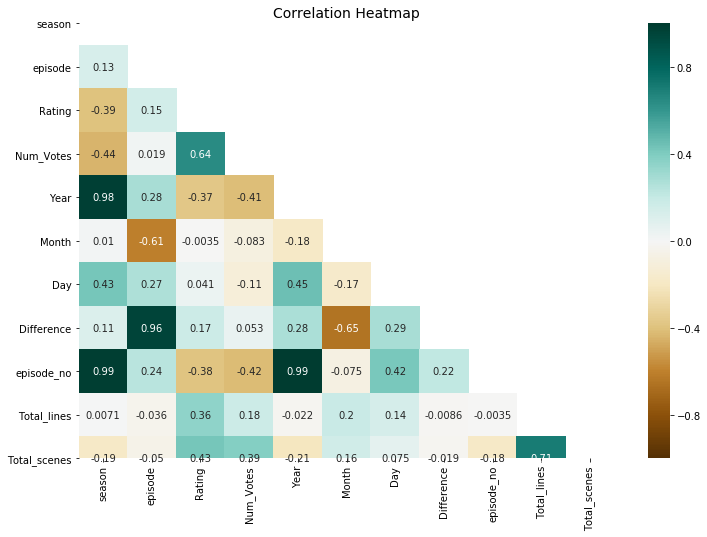

In [131]:
plt.figure(figsize=(12,8))

mask = np.triu(np.ones_like(df_ep.corr(), dtype=np.bool))
sns.heatmap(df_ep.corr(),mask=mask,vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Heatmap', fontsize=14)
plt.savefig('./Visualizations/Correlation Heatmap.png')
plt.show()

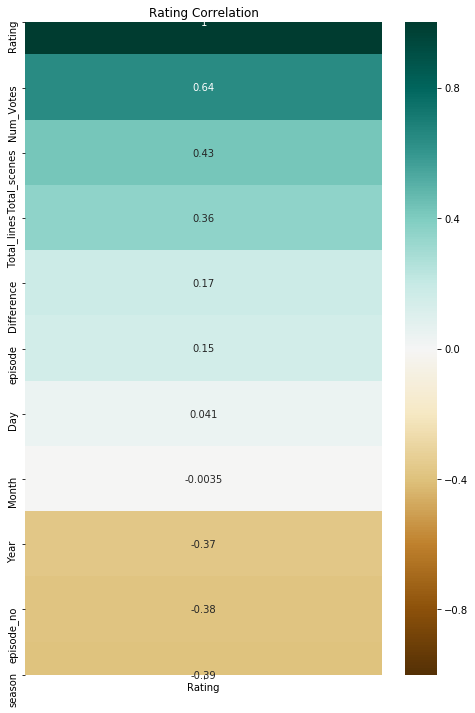

In [132]:
plt.figure(figsize=(8,12))

sns.heatmap(df_ep.corr()[['Rating']].sort_values(by='Rating',ascending=False),vmin=-1,vmax=1,annot=True,cmap='BrBG')
plt.title('Rating Correlation')
plt.savefig('./Visualizations/Rating Correlation.png')
plt.show()

Rating is positively correlated with Total_lines and Total_scenes

### Total lines vs Rating

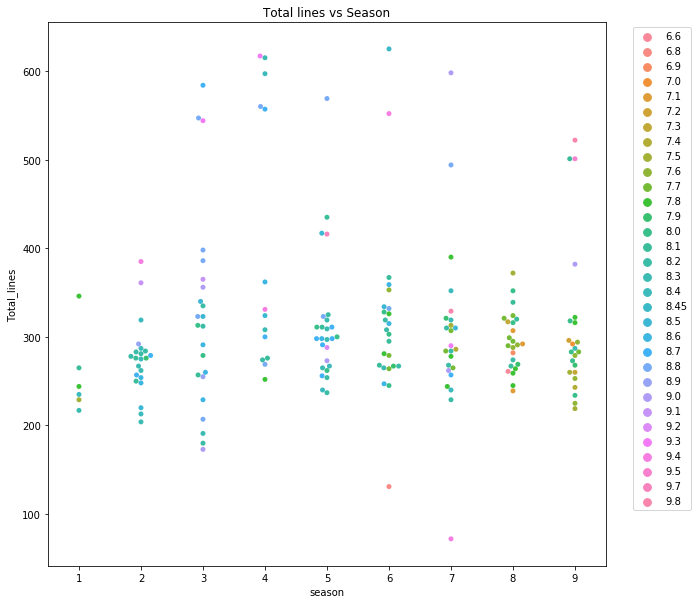

In [133]:
plt.figure(figsize=(10,10))

sns.swarmplot(x='season',y='Total_lines',hue='Rating',data=df_ep)
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
plt.title('Total lines vs Season')
plt.savefig('./Visualizations/Total lines vs Season.png')
plt.show()

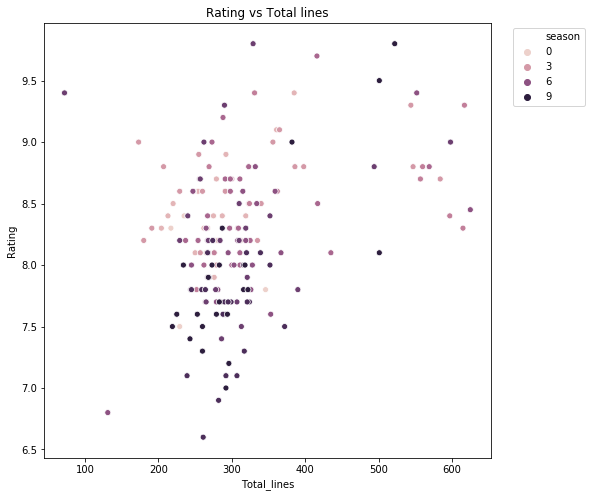

In [134]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Total_lines', y='Rating', hue='season', data=df_ep)
plt.title('Rating vs Total lines')
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
plt.savefig('./Visualizations/Rating vs Total lines.png')
plt.show()

There is a uward ternd seen here, more the total lines better is the rating. Most of the episodes lie in the range 200-350 lines and 7.7 to 8.7 rating. Season 8 does not have single episode with total number of lines more than 400, it also has the worst mean rating

### Rating vs Total number of scenes

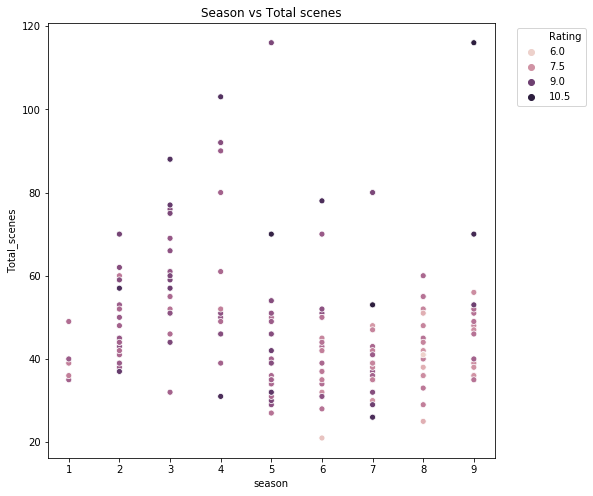

In [135]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='season',y='Total_scenes',hue='Rating',data=df_ep)
plt.title('Season vs Total scenes')
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left')
plt.savefig('./Visualizations/Season vs Total scenes.png')
plt.show()

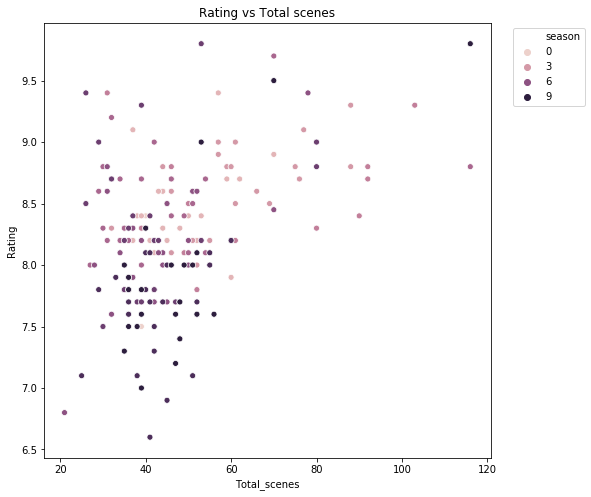

In [136]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Total_scenes', y='Rating', hue='season', data=df_ep)
plt.title('Rating vs Total scenes')
plt.legend(bbox_to_anchor=(1.04,1),loc='upper left')
plt.savefig('./Visualizations/Rating vs Total scenes.png')
plt.show()

Similar pattern seen like Total_lines. An upward trend is seen - more the total scenes better the ratings. Major concentration of episodes lies in the 30-55 scenes range wherein most episodes of seasons 7,8 and 9 tend to have the lower ratings.

### Speaker

In [137]:
speaker_list = ['Michael','Dwight','Jim','Pam','Andy']
df_char = df[df['speaker'].isin(speaker_list)]
df_char

,season,episode,scene,line_text,speaker
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim
2,1,1,1,So you've come to the master for guidance? Is ...,Michael
3,1,1,1,"Actually, you called me in here, but yeah.",Jim
4,1,1,1,"All right. Well, let me show you how it's done.",Michael
...,...,...,...,...,...
59885,9,23,102,I spent so much of my time here at Dunder Miff...,Andy
59889,9,23,106,Imagine going back and watching a tape of your...,Jim
59891,9,23,107,Thanks Phyl.,Jim
59907,9,23,115,I sold paper at this company for 12 years. My ...,Jim


In [138]:
df_char_t = df_char.pivot_table(index='speaker', columns=['season','episode'], values='line_text',aggfunc='count')
df_char_t

season      1                                      2                     ...  \
episode    1     2     3     4      5      6      1      2     3     4   ...   
speaker                                                                  ...   
Andy      NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN  ...   
Dwight   29.0  19.0  62.0  58.0   26.0   28.0   39.0   11.0  58.0  65.0  ...   
Jim      36.0  27.0  42.0  49.0   22.0   55.0   33.0   16.0  56.0  51.0  ...   
Michael  81.0  81.0  56.0  79.0  106.0  106.0  106.0  100.0  83.0  69.0  ...   
Pam      41.0  16.0  32.0  22.0   14.0   45.0   41.0   27.0  35.0  22.0  ...   

season      9                                                        
episode    14    15    16    17    18    19    20    21    22    23  
speaker                                                              
Andy      NaN  62.0  83.0   5.0  11.0  31.0  39.0  68.0  44.0  31.0  
Dwight   37.0  32.0  44.0  51.0  37.0  61.0  21.0  54.0  87.0  76.0  
Jim      30.0  26.0  28.0   6.0  31.0  15.0  17.0  63.0  89.0  73.0  
Michael   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  
Pam      57.0  28.0  55.0  21.0  42.0   9.0  22.0  30.0  34.0  45.0  

[5 rows x 186 columns]

In [139]:
df_char_t = df_char_t.transpose()
df_char_t = df_char_t.reset_index()

In [140]:
del df_char_t['season']
del df_char_t['episode']

In [141]:
df_char_t = pd.concat([df_char_t,df_imdb['Rating']],axis=1)
df_char_t

,Andy,Dwight,Jim,Michael,Pam,Rating
0,NaN,29.0,36.0,81.0,41.0,7.5
1,NaN,19.0,27.0,81.0,16.0,8.3
2,NaN,62.0,42.0,56.0,32.0,7.8
3,NaN,58.0,49.0,79.0,22.0,8.1
4,NaN,26.0,22.0,106.0,14.0,8.4
...,...,...,...,...,...,...
181,31.0,61.0,15.0,NaN,9.0,8.0
182,39.0,21.0,17.0,NaN,22.0,8.0
183,68.0,54.0,63.0,NaN,30.0,9.0
184,44.0,87.0,89.0,NaN,34.0,9.5


<Figure size 1800x720 with 0 Axes>

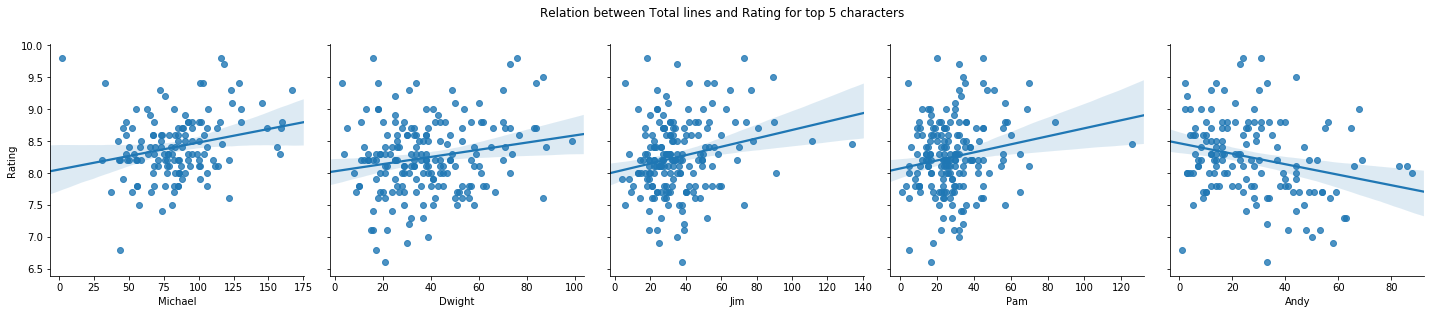

In [142]:
plt.figure(figsize=(25,10))
g = sns.PairGrid(df_char_t, y_vars=["Rating"],x_vars=["Michael","Dwight","Jim","Pam","Andy"],height=4)
g.map(sns.regplot)
plt.suptitle('Relation between Total lines and Rating for top 5 characters',y=1.08)
plt.savefig('./Visualizations/Relation between Total lines and Rating for top 5 characters.png')
plt.show()

There is a upward trend for Top 5 character except Andy, i.e. Rating increases with increase in number of lines, except Andy. Slope is less for Dwight, means increase in lines spoken by Dwight does not effect rating as much as Michael, Jim and Pam.Raitng drops when lines spoken by Andy increases

Investigating Andy 

In [153]:
andy = pd.concat([df_char_t,df_ep],axis=1)
andy = andy.groupby(andy.columns, axis=1).agg(np.max)

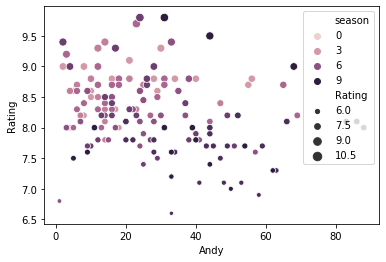

In [157]:
sns.scatterplot(x='Andy',y='Rating',hue='season',size='Rating',data=andy)

Most of Andy's higher lines seen during seasons 8 and 9 episodes which have lower ratings. He does not have higher lines in other seasons as much linking his major screen presence and lines to decline in season 8 and 9 ratings.